# Precios de Airbnb en Nueva York 2019

## Objetivo

Se busca comprender los datos mencionados mediante el uso de bibliotecas de Python, como Pandas, Matplotlib y Seaborn, entre otras.

Una vez logrado esto, se apunta a entrenar un modelo de aprendizaje automático que, en última instancia, sea capaz de predecir el precio de un Airbnb basándose en otros campos del dataset.

## Introducción

### Contexto Empresarial

En su búsqueda de constante mejora, los ejecutivos de Airbnb han decidido buscar una forma de asistir a los nuevos anfitriones recientemente registrados en la plataforma. De esta forma, esperan facilitarles el camino haciendo más conveniente el alquiler de una de sus propiedades, o parte de ella, como una habitación. Para simplificar, se lo mencionará como "un Airbnb".

Teniendo esto en cuenta, se han acercado a su equipo de científicos de datos a fin de encargarles diferentes tareas. Una de ellas consiste en estudiar y predecir los precios de los Airbnb. Inicialmente, se realizará este trabajo considerando solamente la ciudad de Nueva York.

### Contexto Analítico

El mencionado equipo cuenta con una serie de datos de recolección propia, donde se describen los distintos Airbnb, indicando sus propietarios o anfitriones, su ubicación, precio, etc.

A priori, se estima que podría aplicarse un modelo de aprendizaje no supervisado. En particular el de regresión lineal, ya que la variable objetivo es numérica, contínua. Sin embargo, previamente se deberá evaluar la calidad de los datos, pasando luego a una exploración que habilite el reconocimiento preliminar de patrones.

### Descripción del Dataset

Este dataset proporciona información detallada sobre la actividad de las listas de alojamiento en la ciudad durante el año 2019. Su objetivo principal es permitir obtener una comprensión más profunda de los anfitriones, la disponibilidad geográfica, y otras métricas necesarias para realizar predicciones y extraer conclusiones.

El dataset cuenta con varios campos, y se los describe a continuación:

1. id: Identificador único del Airbnb.
 -  Variable cuantitativa de valores enteros que funciona como una etiqueta, en realidad.
2. name: Nombre o título del Airbnb.
 - Variable cualitativa de texto.
3. host_id: Identificador único del anfitrión.
 - Variable cuantitativa de valores enteros que funciona como una etiqueta.
4. host_name: Nombre del anfitrión.
 - Variable cualitativa de texto.
5. neighbourhood_group: Distrito al que pertenece el Airbnb. Literalmente es grupo de barrio, pero se adopta distrito por conveniencia.
 - Variable cualitiva, categórica, con el nombre del grupo de barrios.
6. neighbourhood: Barrio específico donde se encuentra el Airbnb.
 - Variable cualitativa, categórica, con el nombre del barrio.
7. latitude: Latitud de la ubicación del Airbnb.
 - Variable cuantitativa de coordenadas geográficas.
8. longitude: Longitud de la ubicación de la propiedad.
 - Variable cuantitativa de coordenadas geográficas.
9. room_type: Tipo de habitación ofrecida (por ejemplo, habitación privada, apartamento completo).
 - Variable cualitativa, categórica.
10. price: Precio de alquiler por noche del Airbnb.
 - Variable cuantitativa de valores decimales.
11. minimum_nights: Número mínimo de noches requeridas para reservar.
 - Variable cuantitativa de valores enteros.
12. number_of_reviews: Número de reseñas recibidas por la propiedad.
 - Variable cuantitativa de valores enteros.
13. last_review: Fecha de la última reseña recibida.
 - Variable cuantitativa de tipo fecha.
14. reviews_per_month: Promedio de reseñas mensuales.
 - Variable cuantitativa con valores decimales.
15. calculated_host_listings_count: Representa la cantidad de alojamientos únicos que un anfitrión ha registrado en la plataforma.
 - Variable cuantitativa de valores enteros.
16. availability_365: Número de días en los que la propiedad está disponible durante el año.
 - Variable cuantitativa de valores enteros.


Este dataset permite abordar una variedad de preguntas de investigación e inspira diversas líneas de análisis. Algunos de los aspectos que se pueden investigar incluirían:

- Caracterización de anfitriones y áreas: El dataset ofrece información para aprender sobre anfitriones y áreas geográficas de la ciudad de Nueva York. Se pueden realizar análisis descriptivos para identificar tendencias y características comunes entre ellos.

- Predicciones: Los datos permiten hacer predicciones sobre ubicaciones, precios, revisiones, etc. Se pueden usar técnicas de modelado predictivo para comprender los patrones subyacentes.

- Diferencias de tráfico entre áreas: Se pueden hacer análisis comparativos para investigar diferencias significativas en el tráfico de alojamiento entre áreas. Esto ayuda a identificar factores que influyen en la demanda en diferentes partes de la ciudad.

En principio, se encararán hipótesis como:
- Existen distritos y barrios que cuentan con más propiedades para alquilar por AirBnB que otros.
- Las casas/apartamentos completos se ofrecen en mayor proporción a otros tipos de propiedades a alquilar.
- El distrito de Manhattan cuenta con los alquileres más caros de AirBnB en Nueva York.
- Existe una relación lineal negativa entre la duración mínima de la estadía requerida y el precio de alquiler.
- Existe una relación lineal negativa entre la disponibilidad anual de la propiedad y el precio de alquiler.
- Existe una relación lineal positiva entre la duración mínima de la estadía requerida y la disponibilidad anual de la propiedad.
- Las últimas reseñas deben datar de los días o meses próximos a la fecha del dataset.
- La cantidad de reseñas recibidas por propiedad suele ser un valor bajo.


A posteriori se busca predecir el valor de una propiedad en alquiler en base a su ubicación, el tipo de habitación, y las reseñas que obtiene.

### Fuente

Estos datos abiertos de las métricas de Airbnb en la ciudad de Nueva York corresponden al año 2019 y pueden encontrarse aquí:

https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

## Exploración de los Datos

### Bibliotecas

Se procede a la importación de diferentes bibliotecasa las que se dará distintos usos.

<font size=+1>Para Uso General</font>

In [1]:
import numpy                   as np
import pandas                  as pd

<font size=+1>Para Generación de Gráficos</font>

In [2]:
import matplotlib              as mpl
import matplotlib.pyplot       as plt
import seaborn                 as sns

<font size=+1>Para Análisis de Variables 'nghbhood' y 'nghbhood_group'</font>

In [3]:
#!pip install wordcloud # necesario si se corre en un entorno de Colab usando TPUs
from wordcloud import WordCloud
import re
from collections import Counter, defaultdict

<font size=+1>Para Análisis de Variables 'latitude' y 'longitude'</font>

In [4]:
import requests
import geopandas as gpd
import matplotlib.patches as mpatches

<font size=+1>Para Estudiar Relaciones Entre Variables</font>

In [5]:
from sklearn.preprocessing import LabelEncoder

Posteriormente, en la sección de implementación de modelos, habrá otro apartado donde se importarán más bibliotecas.

### Carga de Datos

In [6]:
# Lectura del dataset
file_path = 'https://raw.githubusercontent.com/juanimoralesv/coderhdatascience01/main/DSci01--TF-x04--AB_NYC_2019.csv'

# Almacenado en un DataFrame de Pandas
df_abnb = pd.read_csv(file_path)

In [7]:
# Primera visualización del dataset
pd.set_option('display.max_columns', None)
df_abnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Exploración General

In [8]:
# Filas y columnas
df_abnb.shape

(48895, 16)

In [9]:
# Información de campos, nulos, tipos de dato
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

El campo last_review se lista como tipo "object", ya que son fechas, pero están detectadas como texto. Posteriormente se modificará el tipo para poder darle uso adecuado.

In [10]:
# Descripción estadística
df_abnb.describe(include = 'all').T

count unique              top   freq  \
id                              48895.0    NaN              NaN    NaN   
name                              48879  47905   Hillside Hotel     18   
host_id                         48895.0    NaN              NaN    NaN   
host_name                         48874  11452          Michael    417   
neighbourhood_group               48895      5        Manhattan  21661   
neighbourhood                     48895    221     Williamsburg   3920   
latitude                        48895.0    NaN              NaN    NaN   
longitude                       48895.0    NaN              NaN    NaN   
room_type                         48895      3  Entire home/apt  25409   
price                           48895.0    NaN              NaN    NaN   
minimum_nights                  48895.0    NaN              NaN    NaN   
number_of_reviews               48895.0    NaN              NaN    NaN   
last_review                       38843   1764       2019-06-23   1413   
reviews_per_month               38843.0    NaN              NaN    NaN   
calculated_host_listings_count  48895.0    NaN              NaN    NaN   
availability_365                48895.0    NaN              NaN    NaN   

                                          mean              std       min  \
id                              19017143.23618   10983108.38561    2539.0   
name                                       NaN              NaN       NaN   
host_id                         67620010.64661  78610967.032667    2438.0   
host_name                                  NaN              NaN       NaN   
neighbourhood_group                        NaN              NaN       NaN   
neighbourhood                              NaN              NaN       NaN   
latitude                             40.728949          0.05453  40.49979   
longitude                            -73.95217         0.046157 -74.24442   
room_type                                  NaN              NaN       NaN   
price                               152.720687        240.15417       0.0   
minimum_nights                        7.029962         20.51055       1.0   
number_of_reviews                    23.274466        44.550582       0.0   
last_review                                NaN              NaN       NaN   
reviews_per_month                     1.373221         1.680442      0.01   
calculated_host_listings_count        7.143982        32.952519       1.0   
availability_365                    112.781327       131.622289       0.0   

                                      25%         50%          75%  \
id                              9471945.0  19677284.0   29152178.5   
name                                  NaN         NaN          NaN   
host_id                         7822033.0  30793816.0  107434423.0   
host_name                             NaN         NaN          NaN   
neighbourhood_group                   NaN         NaN          NaN   
neighbourhood                         NaN         NaN          NaN   
latitude                          40.6901    40.72307    40.763115   
longitude                       -73.98307   -73.95568   -73.936275   
room_type                             NaN         NaN          NaN   
price                                69.0       106.0        175.0   
minimum_nights                        1.0         3.0          5.0   
number_of_reviews                     1.0         5.0         24.0   
last_review                           NaN         NaN          NaN   
reviews_per_month                    0.19        0.72         2.02   
calculated_host_listings_count        1.0         1.0          2.0   
availability_365                      0.0        45.0        227.0   

                                        max  
id                               36487245.0  
name                                    NaN  
host_id                         274321313.0  
host_name                               NaN  
neighbourhood_group                     NaN 

In [11]:
# Proporciones de nulos
df_abnb.isnull().mean()

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

Únicamente los campos last_review y reviews_per_month presentan elevadas cantidades de datos nulos. Deberá evaluarse cómo proceder con ellos. De momento, se utilizan estos campos tal y como están en el dataset.

In [12]:
# Cantidad de valores únicos por campo
df_abnb.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [13]:
# Algunas transformaciones iniciales

# Se establece "id" cómo índice del DataFrame
df_abnb.set_index('id', inplace=True)
# Se llevan a cabo los siguientes cambios de nombre de los campos, por comodidad:
# De 'neighbourhood_group' a 'nghbhood_group'
# De 'neighbourhood' a 'nghbhood'
# De 'number_of_reviews' a 'no_of_reviews'
# De 'reviews_per_month' a 'reviews_month'
# De 'calculated_host_listings_count' a 'calc_hlstngs_count'
df_abnb.rename(columns={'neighbourhood_group': 'nghbhood_group', 'neighbourhood': 'nghbhood', 'number_of_reviews': 'no_of_reviews', 'reviews_per_month': 'reviews_month', 'calculated_host_listings_count': 'calc_hlstngs_count'}, inplace=True)

df_abnb.head()

name  host_id    host_name  \
id                                                                             
2539                Clean & quiet apt home by the park     2787         John   
2595                             Skylit Midtown Castle     2845     Jennifer   
3647               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth   
3831                   Cozy Entire Floor of Brownstone     4869  LisaRoxanne   
5022  Entire Apt: Spacious Studio/Loft by central park     7192        Laura   

     nghbhood_group      nghbhood  latitude  longitude        room_type  \
id                                                                        
2539       Brooklyn    Kensington  40.64749  -73.97237     Private room   
2595      Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
3647      Manhattan        Harlem  40.80902  -73.94190     Private room   
3831       Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
5022      Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

      price  minimum_nights  no_of_reviews last_review  reviews_month  \
id                                                                      
2539    149               1              9  2018-10-19           0.21   
2595    225               1             45  2019-05-21           0.38   
3647    150               3              0         NaN            NaN   
3831     89               1            270  2019-07-05           4.64   
5022     80              10              9  2018-11-19           0.10   

      calc_hlstngs_count  availability_365  
id                                          
2539                   6               365  
2595                   2               355  
3647                   1               365  
3831                   1               194  
5022                   1                 0

In [14]:
# Convertir la columna "last_review" a tipo datetime
df_abnb["last_review"] = pd.to_datetime(df_abnb["last_review"], errors="coerce")
# Verificar si hay valores nulos en la columna
if df_abnb["last_review"].isnull().any():
    print("Existen valores no válidos en la columna 'last_review'.")
else:
    print("Todos los valores en la columna 'last_review' son fechas válidas en formato YYYY-MM-DD.")

Existen valores no válidos en la columna 'last_review'.


In [15]:
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                48879 non-null  object        
 1   host_id             48895 non-null  int64         
 2   host_name           48874 non-null  object        
 3   nghbhood_group      48895 non-null  object        
 4   nghbhood            48895 non-null  object        
 5   latitude            48895 non-null  float64       
 6   longitude           48895 non-null  float64       
 7   room_type           48895 non-null  object        
 8   price               48895 non-null  int64         
 9   minimum_nights      48895 non-null  int64         
 10  no_of_reviews       48895 non-null  int64         
 11  last_review         38843 non-null  datetime64[ns]
 12  reviews_month       38843 non-null  float64       
 13  calc_hlstngs_count  48895 non-null  int64    

En la primera ocasión que se corrió .info(), la columna last_review tenía 38843 valores que no eran nulos. Ahora que se corrió nuevamente, esa cantidad de no nulos se mantiene. Por lo que se infiere que, originalmente, todos los no nulos eran fechas que respondían al formato YYYY-MM-DD, pero estaban todas como tipo objeto.

### Exploración Variable a Variable

In [16]:
# Configuración de Matplotlib
plt.style.use('seaborn-v0_8-whitegrid')

In [17]:
#plt.style.use('default')

#### Índice, o 'id'

In [18]:
print('La cantidad de valores únicos de "id" es:', df_abnb.index.nunique())

La cantidad de valores únicos de "id" es: 48895


Se aprecia que todos los valores del índice son únicos.

#### Variable 'name'

In [19]:
print('La cantidad de valores únicos de "name" es:', df_abnb['name'].nunique())

La cantidad de valores únicos de "name" es: 47905


In [20]:
print('Es decir, hay: ',df_abnb.shape[0]-df_abnb['name'].nunique(), 'nombres de Airbnbs repetidos')

Es decir, hay:  990 nombres de Airbnbs repetidos


In [21]:
print('Esta es una lista de los 20 que más se repiten, y cuántas veces:\n')
df_abnb.groupby('name')['name'].count().sort_values(ascending=False).head(20)

Esta es una lista de los 20 que más se repiten, y cuántas veces:



name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Private Room                                          11
Loft Suite @ The Box House Hotel                      11
Artsy Private BR in Fort Greene Cumberland            10
Private room                                          10
Private room in Brooklyn                               8
Cozy Brooklyn Apartment                                8
Private room in Williamsburg                           8
Beautiful Brooklyn Brownstone                          8
Harlem Gem                                             7
IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS     6
New York Apartment                                     6
Bushwick Oasis                                         6
Cozy East Village Apartment                            6
Home Sweet Home           

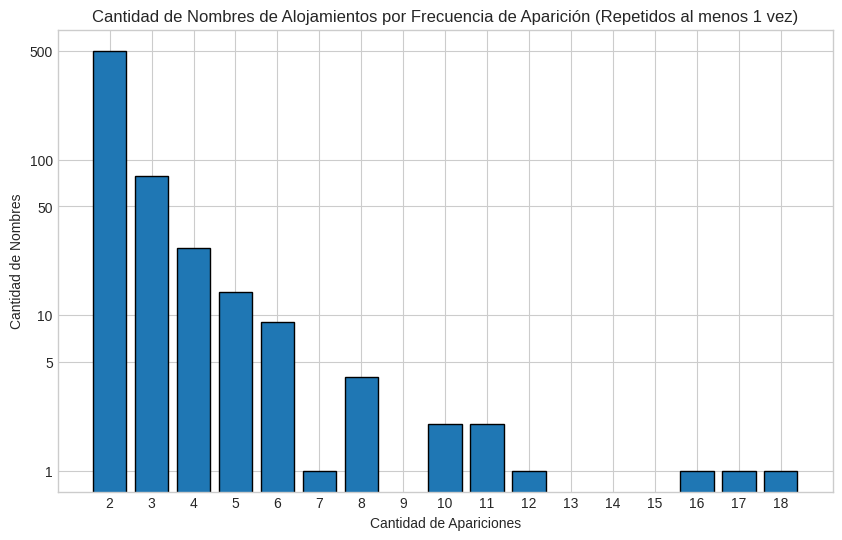

In [22]:
# Contar la frecuencia de cada nombre
name_counts = df_abnb['name'].value_counts()

# Filtrar solo los nombres que se repiten al menos dos veces
name_counts_filtered = name_counts[name_counts >= 2]

# Agrupar los nombres por su frecuencia de aparición
name_counts_grouped = name_counts_filtered.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(name_counts_grouped.index, name_counts_grouped.values, edgecolor='black')

# Agregar etiquetas y título
plt.title('Cantidad de Nombres de Alojamientos por Frecuencia de Aparición (Repetidos al menos 1 vez)')
plt.xlabel('Cantidad de Apariciones')
plt.ylabel('Cantidad de Nombres')

# Hacer la escala del eje Y logarítmica
plt.yscale('log')

# Establecer los valores del eje Y
plt.yticks([1, 5, 10, 50, 100, 500], ['1', '5', '10', '50', '100', '500'])

# Establecer los valores del eje X y alinearlos con los nombres de los alojamientos
plt.xticks([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'])

plt.show()

Con este gráfico se aprecia que con una frecuencia de 500 un mismo nombre de Airbnb aparece dos veces entre los datos; con una de 80, tres veces; y así sucesivamente.

#### Variable 'host_id'

Host significa anfitrión.

In [23]:
print('La cantidad de valores únicos de "host_id" es:', df_abnb['host_id'].nunique())

La cantidad de valores únicos de "host_id" es: 37457


In [24]:
print('Es decir, hay ',df_abnb.shape[0]-df_abnb['host_id'].nunique(), ' anfitriones que registraron más de un Airbnb.')

Es decir, hay  11438  anfitriones que registraron más de un Airbnb.


In [25]:
print('Esta es una lista de los 20 que más registraron, y cuántos:\n')

# Agrupa por host_id y cuenta la cantidad de registros
host_counts = df_abnb.groupby('host_id')['host_id'].count()

# Ordena los resultados en orden descendente
host_counts_sorted = host_counts.sort_values(ascending=False)

# Crea una nueva columna con el host_name
host_counts_sorted = host_counts_sorted.to_frame(name='counts')
host_counts_sorted = host_counts_sorted.reset_index()

# Elimina duplicados de la columna 'host_id' en df_abnb
df_abnb_unique = df_abnb.drop_duplicates(subset=['host_id'])

host_counts_sorted['host_name'] = host_counts_sorted['host_id'].map(df_abnb_unique.set_index('host_id')['host_name'])

# Muestra los primeros 20 resultados
print(host_counts_sorted.set_index('host_id').head(20))

Esta es una lista de los 20 que más registraron, y cuántos:

           counts          host_name
host_id                             
219517861     327       Sonder (NYC)
107434423     232         Blueground
30283594      121               Kara
137358866     103             Kazuya
16098958       96     Jeremy & Laura
12243051       96             Sonder
61391963       91  Corporate Housing
22541573       87                Ken
200380610      65            Pranjal
1475015        52               Mike
7503643        52               Vida
120762452      50            Stanley
2856748        49              Ruchi
205031545      49         Red Awning
190921808      47               John
26377263       43               Stat
2119276        39               Host
19303369       37             Hiroki
119669058      34            Melissa
25237492       34            Juliana


#### Variable 'host_name'

In [26]:
print('La cantidad de valores únicos de "host_name" es:', df_abnb['host_name'].nunique())

La cantidad de valores únicos de "host_name" es: 11452


In [27]:
print('Es decir, hay ',df_abnb.shape[0]-df_abnb['host_name'].nunique(), ' anfitriones con nombres repetidos.')

Es decir, hay  37443  anfitriones con nombres repetidos.


#### Variables 'nghbhood_group', 'nghbhood'

Significan distrito y barrio. Se plantea una nube de palabras, gráfico de torta, de barras y tablas numéricas. Así, se puede investigar la hipótesis: existen distritos y barrios que cuentan con más Airbnbs que otros.

In [28]:
print('La cantidad de valores únicos de "nghbhood_group" es:', df_abnb['nghbhood_group'].nunique(),'\n')
print('Estos son los valores únicos de "nghbhood_group":')
print(df_abnb['nghbhood_group'].unique())

La cantidad de valores únicos de "nghbhood_group" es: 5 

Estos son los valores únicos de "nghbhood_group":
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [29]:
print('La cantidad de valores únicos de "nghbhood" es:', df_abnb['nghbhood'].nunique(),'\n')
print('Estos son los valores únicos de "nghbhood":')
print(df_abnb['nghbhood'].unique())

La cantidad de valores únicos de "nghbhood" es: 221 

Estos son los valores únicos de "nghbhood":
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bri

In [30]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns
    EXACT colors to certain words based on the color to words mapping."""

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color for (color, words) in color_to_words.items() for word in words}
        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

Esta clase será la encargada de asignar colores a las palabras con las que se alimente el objeto de wordcloud que creará la nube de palabras.

In [31]:
# Calcular las frecuencias de los barrios
frequencies = Counter(df_abnb['nghbhood'])

# Crear el diccionario de barrios por distrito
dic_barr_por_dist = defaultdict(list)
for barrio, distrito in zip(df_abnb['nghbhood'], df_abnb['nghbhood_group']):
    dic_barr_por_dist[distrito].append(barrio)

# Crear el diccionario de colores para cada grupo de barrios
color_to_words = {
    '#7D82B8': list(set(dic_barr_por_dist.get('Brooklyn', []))),
    '#A4F9C8': list(set(dic_barr_por_dist.get('Manhattan', []))),
    '#E55934': list(set(dic_barr_por_dist.get('Queens', []))),
    '#DDB967': list(set(dic_barr_por_dist.get('Bronx', []))),
    '#F6D4BA': list(set(dic_barr_por_dist.get('Staten Island', [])))
}

El diccionario color_to_words es crucial, ya que el objeto de wordcloud buscará en los valores las palabras que se le pasen para crear la nube. Si encuentra dicha palabra, tomará la llave correspondiente, que es un color, y con él pintará la palabra.

In [32]:
# Crear la nube de palabras usando las frecuencias
wc = WordCloud(height=2000, width=4000, max_words=221, background_color="#1C1C1C").generate_from_frequencies(frequencies)

# Definir el color por defecto
default_color = 'grey'

# Crear la función de color
simple_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Recolorear la nube de palabras según el diccionario color_to_words
wc.recolor(color_func=simple_color_func)

El objeto de wordcloud se llamó wc y, en este caso, se lo crea indicándole cuáles son las palabras que tiene que usar (los barrios) y cuántas veces aparece (la frecuencia).

A continuación, se procede esencialmente de la misma manera para crear una nube de palabras con los nombres de los distritos. De todos modos, esta nube de palabras cumplirá la función de ser la referencia de colores para la de los barrios.

In [33]:
# Crear un diccionario de colores para los distritos
district_colors = {
    '#7D82B8': 'Brooklyn',
    '#A4F9C8': 'Manhattan',
    '#E55934': 'Queens',
    '#DDB967': 'Bronx',
    '#F6D4BA': 'Staten Island'
}

# Crear un diccionario de frecuencias para los distritos
# Se les asigna arbitrariamente 1, para que se muestren en similar tamaño
frequencies_districts = {name: 1 for name in district_colors.values()}

# Crear la nube de palabras para los distritos
wc_districts = WordCloud(height=2000, width=4000, max_words=5, background_color="#1C1C1C").generate_from_frequencies(frequencies_districts)

# Crear la función de color para los distritos
simple_color_func_districts = SimpleGroupedColorFunc(
    {color: [name] for color, name in district_colors.items()}, default_color
)

# Recolorear la nube de palabras para los distritos
wc_districts.recolor(color_func=simple_color_func_districts)

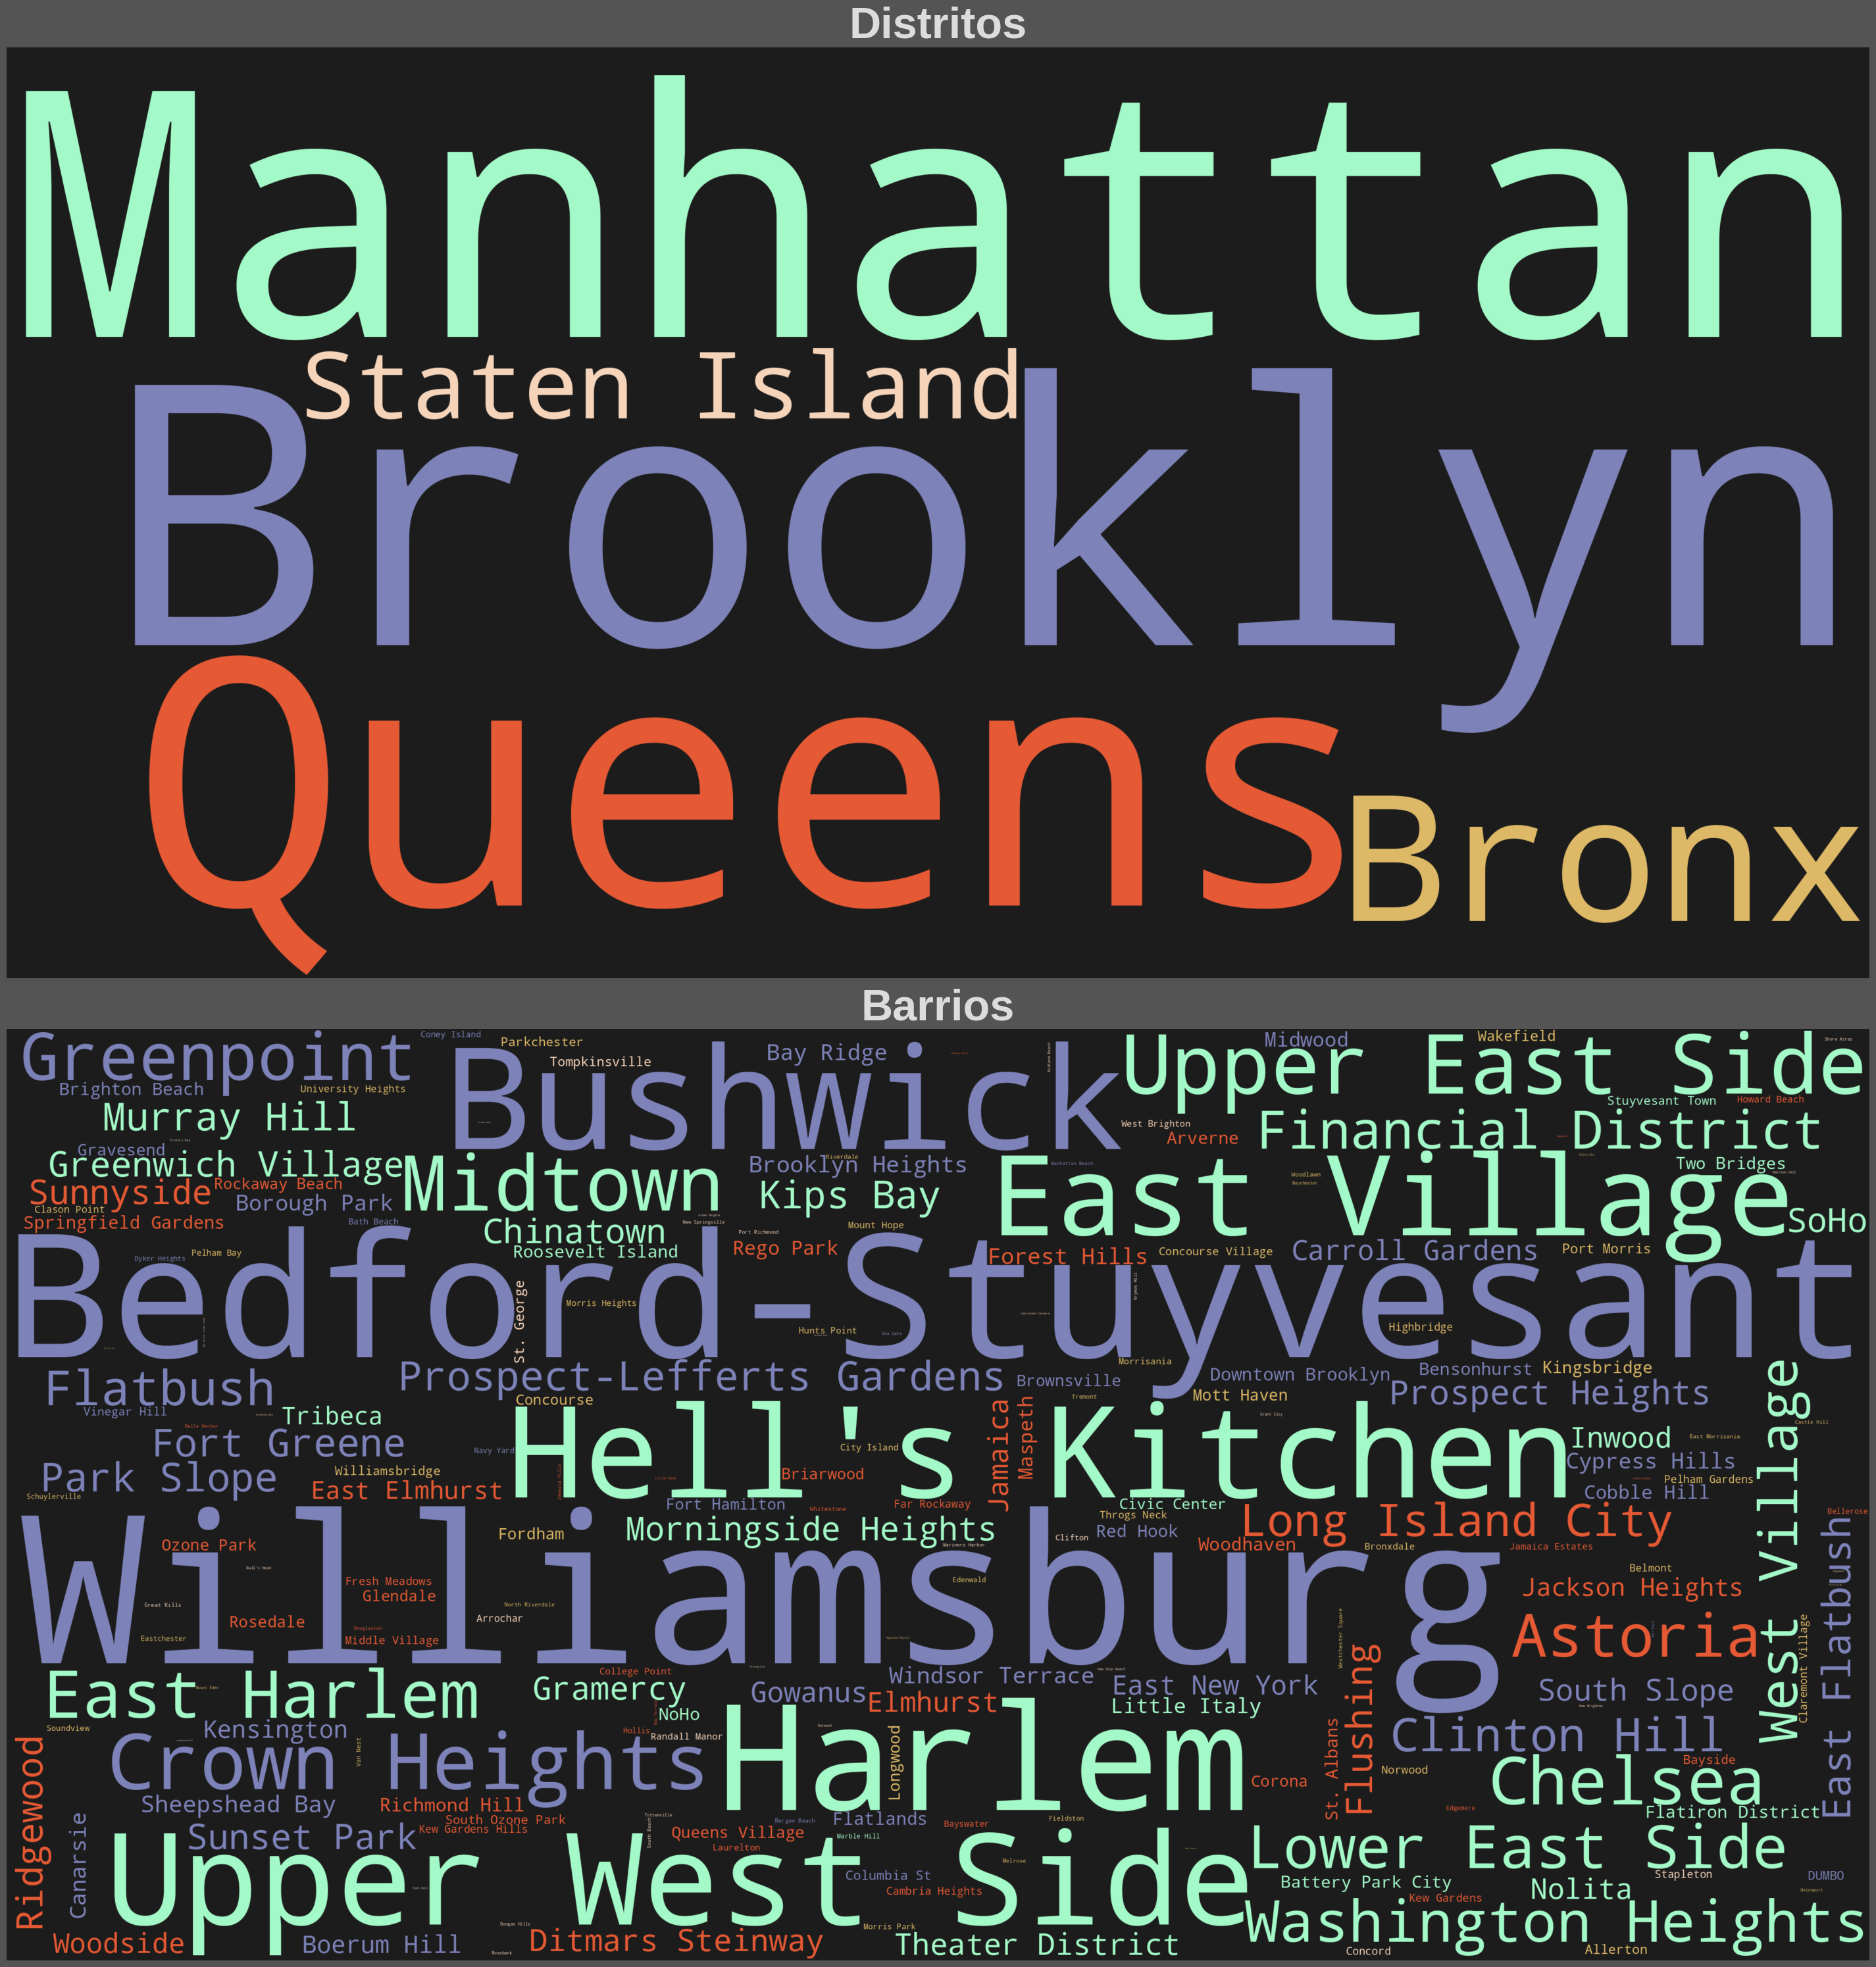

In [34]:
# Mostrar ambas nubes de palabras una sobre la otra
plt.figure(figsize=(45, 30), facecolor='#545454')
plt.subplot(2, 1, 1)
plt.imshow(wc_districts, interpolation="bilinear")
plt.axis("off")
plt.title("Distritos", fontsize=48, fontweight='bold', color='#DCDCDC')
plt.subplot(2, 1, 2)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Barrios", fontsize=48, fontweight='bold', color='#DCDCDC')
plt.tight_layout()
plt.show()

Se puede hacer clic en la imagen para agrandarla.

La primera nube de palabras presenta los cinco distritos de Nueva York. Los colores con que están pintados se asignan a los barrios que contienen, y que pueden verse en la segunda nube de palabras.

A simple vista es posible notar que hay una mayor cantidad de barrios pintados en los colores de Brooklyn y Manhattan, al tiempo que varios de ellos aparecen con mayor tamaño. Esto último está directamente relacionado con la cantidad de Airbnbs en ellos. Así puede inferirse que aquellos dos distritos presentan mayor cantidad de Airbnbs.

Sin embargo, para obtener precisión cuantitativa deberá realizarse un análisis numérico. Esto podría visualizarse en un gráfico de torta.

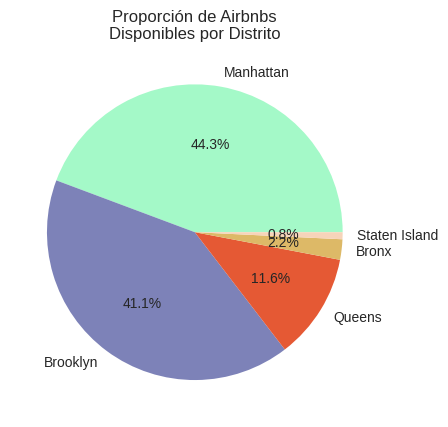

In [35]:
# Gráfico de torta para los distritos
# Obtener los distritos en el mismo orden que en df_abnb['nghbhood_group'].value_counts()
distritos_ordenados = df_abnb['nghbhood_group'].value_counts().index

# Inversión del diccionario que por cada color (clave) daba el distrito (valor),
# procedimiento que era necesario para la biblioteca wordcloud
inverted_district_colors = dict(reversed(item) for item in district_colors.items())
# Este diccionario permite hacer lo opuesto, devolviendo el color cuando se indica
# el nombre de un distrito

# Obtener los colores ordenados en el mismo orden que en df_abnb['nghbhood_group'].value_counts()
colores_ordenados = [inverted_district_colors.get(distrito) for distrito in distritos_ordenados]

# Crear el gráfico de pastel
fig, ax = plt.subplots()
ax.pie(
    df_abnb['nghbhood_group'].value_counts(),
    labels = distritos_ordenados,
    autopct ='%1.1f%%',
    colors = colores_ordenados
)

# Título y etiquetas para el gráfico
ax.set_title('Proporción de Airbnbs\nDisponibles por Distrito')

# Mostrar el gráfico
plt.show()

A continuación puede verse detalladamente qué barrios tienen la mayor cantidad de Airbnbs.

In [36]:
# Extracción de valores buscados
total_propiedades = df_abnb['nghbhood'].count()
propiedades_por_barrio = df_abnb.groupby('nghbhood')['nghbhood'].count()
porcentaje_propiedades = propiedades_por_barrio / total_propiedades * 100
# Creación de nuevo DataFrame en base a un diccionario con el entero de np y
# las Series de Pandas recién obtenidas
tabla_propiedades = pd.DataFrame({
    'Barrio': propiedades_por_barrio.index,
    '# de Propiedades': propiedades_por_barrio.values,
    'Porcentaje': porcentaje_propiedades.values
})
# Formato de los porcentajes
tabla_propiedades['Porcentaje'] = tabla_propiedades['Porcentaje'].apply(lambda x: '{:.2f} %'.format(x))
# Orden descendente por cantidad de propiedades
tabla_propiedades = tabla_propiedades.sort_values(by='# de Propiedades', ascending=False)
# Asignación de índice, para evitar una columna sin un sentido evidente, e
# impresión del top 10 de barrios con más propiedades alquilables
tabla_propiedades.set_index('Barrio').head(10)

# de Propiedades Porcentaje
Barrio                                         
Williamsburg                    3920     8.02 %
Bedford-Stuyvesant              3714     7.60 %
Harlem                          2658     5.44 %
Bushwick                        2465     5.04 %
Upper West Side                 1971     4.03 %
Hell's Kitchen                  1958     4.00 %
East Village                    1853     3.79 %
Upper East Side                 1798     3.68 %
Crown Heights                   1564     3.20 %
Midtown                         1545     3.16 %

También, se puede revisar cuántos barrios hay por distrito.

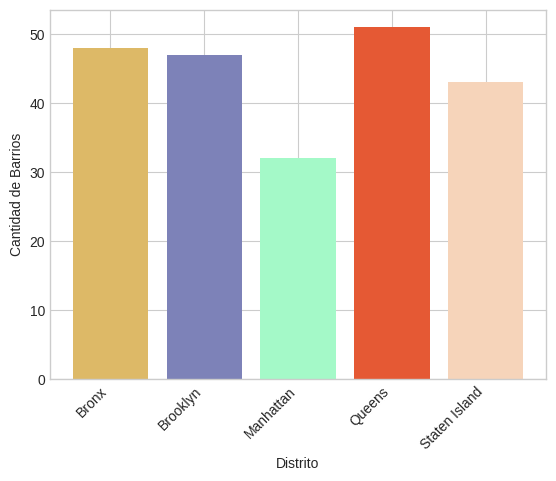

In [37]:
# Agrupar los barrios por distrito y contar la cantidad de barrios en cada uno
barrio_counts = df_abnb.groupby('nghbhood_group')['nghbhood'].nunique()

# Ordenar los colores según aparecen en barrio_counts
color_ordenado_bar = [inverted_district_colors.get(distrito) for distrito in barrio_counts.index]

# Crear el gráfico de barras
fig, ax = plt.subplots()
for i, distrito in enumerate(barrio_counts.index):
    ax.bar(i, barrio_counts[distrito], color = color_ordenado_bar[i])

# Etiquetar los ejes
ax.set_xlabel('Distrito')
ax.set_ylabel('Cantidad de Barrios')

# Rotar las etiquetas del eje X para que sean legibles
plt.xticks(range(len(barrio_counts.index)), barrio_counts.index, rotation = 45, ha = 'right')

# Mostrar el gráfico
plt.show()

#### Variables 'latitude' y 'longitude'

Mediante el estudio de estas variables se pretende dar el contexto geográfico de este conjunto de datos. Para ello, se recurre a las siguientes fuentes:

Una página en el sitio del gobierno de la ciudad de Nueva York:

https://www.nyc.gov/site/planning/data-maps/open-data/bytes-archive.page

En ella, del menú desplegable se selecciona "Administrative and Political Districts - Borough Boundaries (Clipped to Shoreline)", eligiendo el del año correspondiente. De este modo se accede a los archivos de forma de los distritos de la ciudad.

Por otro lado, una página en el sitio del gobierno del estado de Nueva York:

https://data.gis.ny.gov/datasets/sharegisny::nys-civil-boundaries/explore?layer=1

Aquí debe presionarse "download" y luego activar el filtro, para que solamente descargue el archivo con la figura del estado.

En ambos casos, son archivos comprimidos que dentro contienen los archivos de forma necesarios.

In [38]:
# Define las URLs de los archivos desde GitHub
# Para la ciudad:
shp_url = "https://github.com/juanimoralesv/coderhdatascience01/raw/main/nybb.shp"
dbf_url = "https://github.com/juanimoralesv/coderhdatascience01/raw/main/nybb.dbf"
prj_url = "https://github.com/juanimoralesv/coderhdatascience01/raw/main/nybb.prj"
shx_url = "https://github.com/juanimoralesv/coderhdatascience01/raw/main/nybb.shx"

# Para el estado:
shp_e_url = "https://github.com/juanimoralesv/coderhdatascience01/raw/main/State_Shoreline.shp"
dbf_e_url = "https://github.com/juanimoralesv/coderhdatascience01/raw/main/State_Shoreline.dbf"
prj_e_url = "https://github.com/juanimoralesv/coderhdatascience01/raw/main/State_Shoreline.prj"
shx_e_url = "https://github.com/juanimoralesv/coderhdatascience01/raw/main/State_Shoreline.shx"
cpg_e_url = "https://github.com/juanimoralesv/coderhdatascience01/raw/main/State_Shoreline.cpg"

In [39]:
# Descarga los archivos a la carpeta "file" de este
# entorno de Google Colaboratory
def download_file(url, filename):
  response = requests.get(url)
  with open(filename, "wb") as f:
    f.write(response.content)

download_file(shp_url, "/content/nybb.shp")
download_file(dbf_url, "/content/nybb.dbf")
download_file(prj_url, "/content/nybb.prj")
download_file(shx_url, "/content/nybb.shx")

download_file(shp_e_url, "/content/State_Shoreline.shp")
download_file(dbf_e_url, "/content/State_Shoreline.dbf")
download_file(prj_e_url, "/content/State_Shoreline.prj")
download_file(shx_e_url, "/content/State_Shoreline.shx")
download_file(cpg_e_url, "/content/State_Shoreline.cpg")

In [40]:
# Carga los datos de los distritos de Nueva York mediante GeoPandas
ny_distritos = gpd.read_file("/content/nybb.shp", driver="ESRI Shapefile")
# Selección de la proyección del mapa
ny_distritos = ny_distritos.to_crs("EPSG:4326")
ny_distritos = ny_distritos.set_index('BoroCode')
ny_distritos = ny_distritos.sort_index()

In [41]:
# Carga de los datos del estado de Nueva York mediante GeoPandas
ny_estado = gpd.read_file("/content/State_Shoreline.shp", driver="Shapefile")
# Selección de la proyección del mapa
ny_estado = ny_estado.to_crs("EPSG:4326")

In [42]:
# Crea un GeoDataFrame con los datos de los Airbnbs
gdf_abnb = gpd.GeoDataFrame(
    df_abnb,
    geometry=gpd.points_from_xy(df_abnb.longitude, df_abnb.latitude),
    crs="EPSG:4326"
)

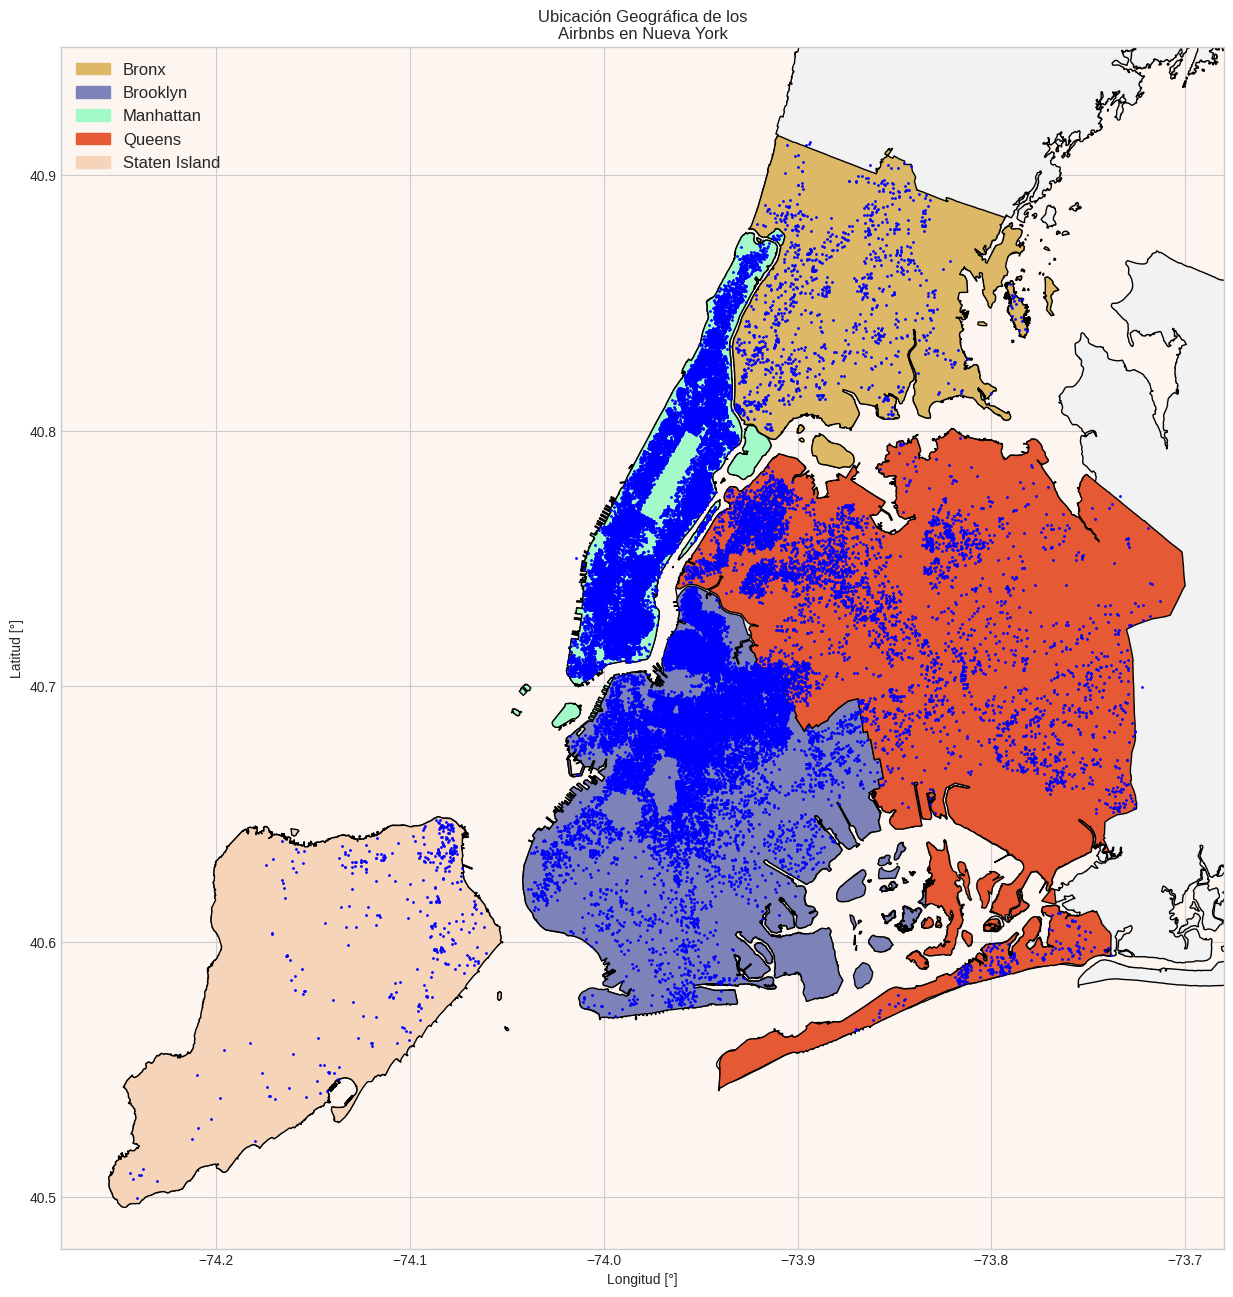

In [43]:
# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(15, 30))

# Dibujo del Estado de Nueva York
ny_estado.plot(ax=ax, color="#f2f2f2", edgecolor="black")

# Asignación de los colores usando el diccionario
for boro_name in ny_distritos['BoroName'].unique():
    color = inverted_district_colors[boro_name]
    ny_distritos[ny_distritos['BoroName'] == boro_name].plot(ax=ax, color=color, edgecolor="black")

# Dibuja los marcadores de los Airbnbs
gdf_abnb.plot(ax=ax, color="blue", markersize=1)

# Agrega un título al mapa
ax.set_title("Ubicación Geográfica de los\nAirbnbs en Nueva York")

# Ajusta los límites del mapa
ax.set_xlim([-74.28, -73.68])
ax.set_ylim([40.48, 40.95])

# Nombra los ejes
ax.set_xlabel("Longitud [°]")
ax.set_ylabel("Latitud [°]")

# Establecer el color de fondo del mapa
ax.set_facecolor("#FDF5F0")

# Crea la leyenda manualmente
patches = []
boro_names = sorted(ny_distritos['BoroName'].unique())

# Asigna los colores a los parches usando el diccionario 'inverted_district_colors'
for boro_name in boro_names:
    color = inverted_district_colors[boro_name]
    patches.append(mpatches.Patch(color=color, label=boro_name))

# Ajusta la leyenda
ax.legend(handles=patches, loc='upper left', fontsize=12)

# Muestra el mapa
plt.show()

Se puede hacer clic en la imagen para agrandarla.

En la imagen se observan los distritos de Nueva York pintados con los colores de la leyenda superior izquierda. En gris puede apreciarse más territorio del estado de Nueva York. No se agregaron más territorios, como podría ser el estado de Nueva Jersey al oeste.

Mediante este mapa se puede conocer la forma de la ciudad, y la ubicación geográfica de sus Airbnbs: los puntos azules. Puede apreciarse visualmente lo que se verificó numéricamente estudiando las variables 'nghbhood' y 'nghbhood_group': Manhattan y Brooklyn evidencian una mayor cantidad de Airbnbs.

#### Variable 'room_type'

Esto significa tipo de habitación.

Aquí se busca investigar la hipótesis: las casas/apartamentos completos se ofrecen en mayor proporción a otros tipos de Airbnb.

In [44]:
# Obtener cantidad de valores únicos en columna 'room_type'
valores_unicos = df_abnb['room_type'].value_counts()
# Cálculo de porcentaje para cada valor único
porcentajes = (valores_unicos / valores_unicos.sum()) * 100

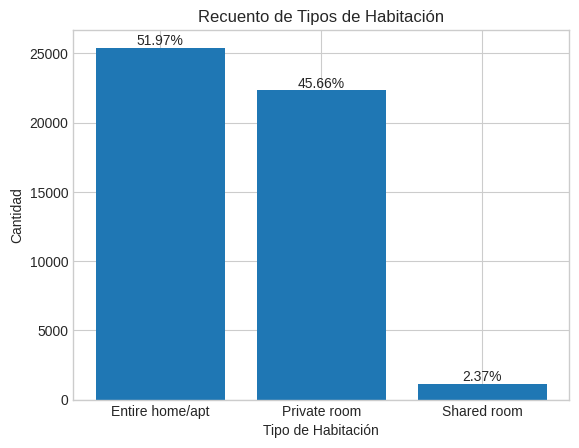

In [45]:
# Creación de figura y ejes
fig, ax = plt.subplots()

# Creación del gráfico de barras
ax.bar(valores_unicos.index, valores_unicos)
# Agregado de etiquetas con porcentajes
for i, cant in enumerate(valores_unicos):
    ax.text(i, cant, f'{porcentajes[i]:.2f}%', ha='center', va='bottom')
# Título y etiquetas para el gráfico
ax.set_title('Recuento de Tipos de Habitación')
ax.set_xlabel('Tipo de Habitación')
ax.set_ylabel('Cantidad')
# Mostrar el gráfico
plt.show()

Se observa que, si bien la hipótesis resulta cierta, no existe una diferencia abrumadora entre los dos tipos más ofrecidos, pero sí respecto del tercero.

#### Variable 'price'

Al tratarse de una variable numérica, primeramente se observa su distribución.

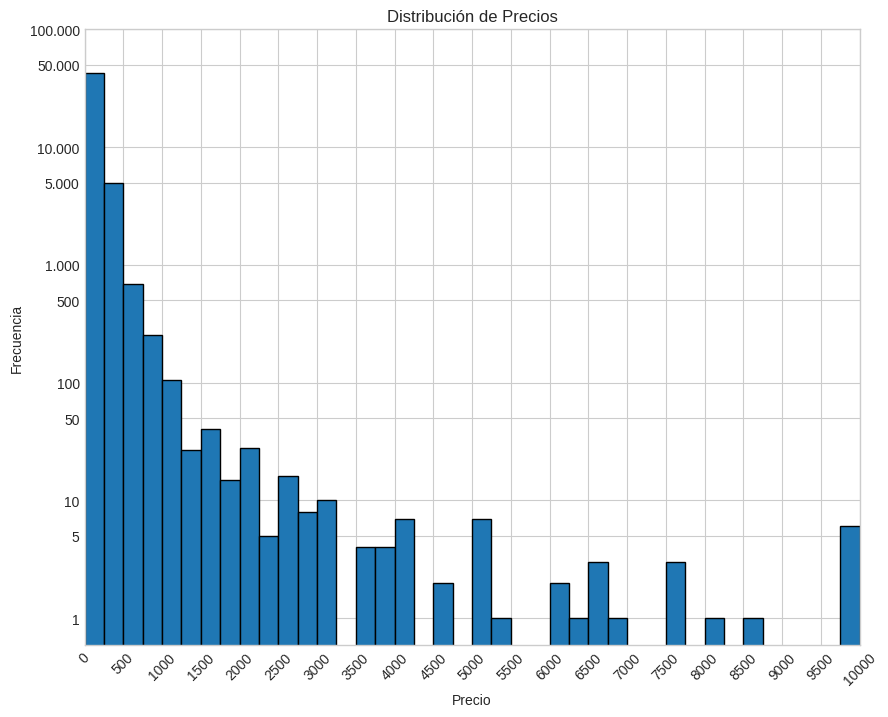

In [46]:
# Creación de la figura
plt.figure(figsize=(10, 8))
# Creación de un histograma
plt.hist(df_abnb['price'], bins=40, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Distribución de Precios')
# Límites del eje X
plt.xlim(0, 10000)
# Marcas del eje X
plt.xticks(range(0, 10001, 500), rotation=45)
# Límites del eje Y
#plt.ylim(0, 100000)
# Aplicación de escala logarítmica en Y
plt.yscale('log')
# Marcas del eje Y
plt.yticks([1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], ['1', '5', '10', '50', '100', '500', '1.000', '5.000', '10.000', '50.000', '100.000'])
# Mostrar el gráfico
plt.show()

Se aprecia que la gran mayoría de los precios se encuentran en valores no mayores de USD 250. Seguidamente se investiga la distribución en este rango.

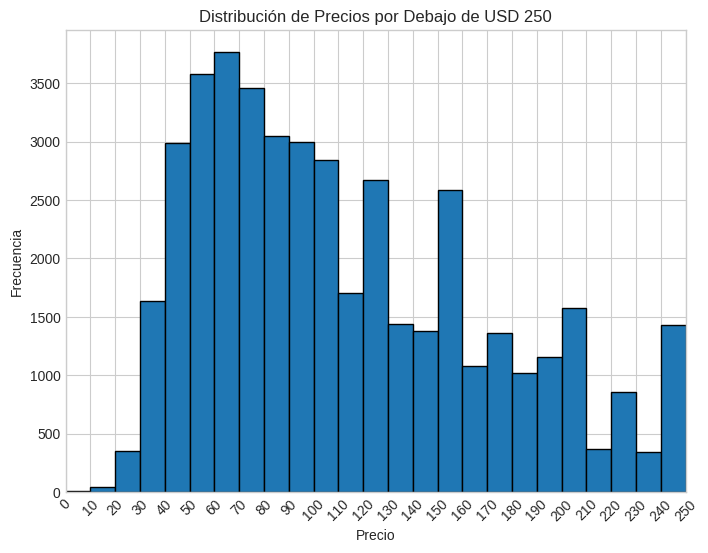

In [47]:
# Creación de la figura
plt.figure(figsize=(8, 6))
# Creación de un histograma
plt.hist(df_abnb['price'].loc[df_abnb['price'] <= 250], bins=25, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Distribución de Precios por Debajo de USD 250')
# Límites del eje X
plt.xlim(0, 250)
# Marcas del eje X
plt.xticks(range(0, 251, 10), rotation=45)
# Mostrar el gráfico
plt.show()

Para una mejor información sobre la distribución de los valores de 'price', se aplica un boxplot.

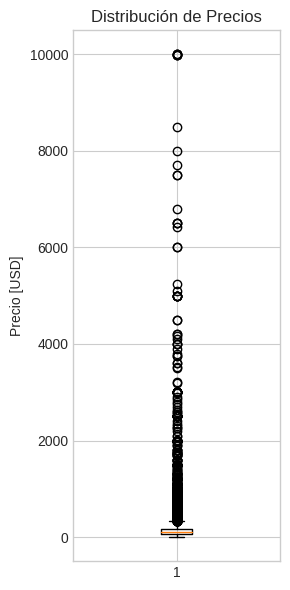

In [48]:
# Creación de figura y ejes
fig, ax = plt.subplots(figsize=(3, 6))
# Creación del gráfico boxplot
ax.boxplot(df_abnb['price'])
# Establecer título y etiquetas de los ejes
ax.set_title('Distribución de Precios')
#ax.set_xlabel('Distrito')
ax.set_ylabel('Precio [USD]')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

Como existen valores anómalos, se repite el gráfico, pero obviando dichos valores.

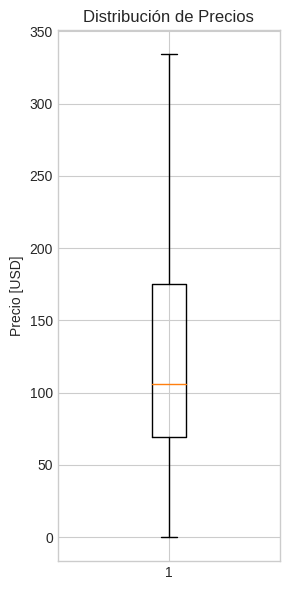

In [49]:
# Creación de figura y ejes
fig, ax = plt.subplots(figsize=(3, 6))
# Creación del gráfico boxplot
ax.boxplot(df_abnb['price'], showfliers=False)
# Establecer título y etiquetas de los ejes
ax.set_title('Distribución de Precios')
#ax.set_xlabel('Distrito')
ax.set_ylabel('Precio [USD]')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [50]:
recuento_outliers = {}
recuento_precios = {}
# Obtener los outliers de los precios
boxplot_dict = ax.boxplot(df_abnb['price'], showfliers=True)
outliers = boxplot_dict['fliers'][0].get_ydata()
# Contar la cantidad de outliers
recuento_outliers = len(outliers)
# Contar la cantidad de precios
recuento_precios = len(df_abnb['price'])
# Crear un DataFrame con los resultados
tabla_resultados = pd.DataFrame({'Cantidad de Precios': [recuento_precios],
                                 'Cantidad de Outliers': [recuento_outliers]})
# Agregado de proporción de cantidad de outliers a cantidad de precios
tabla_resultados['Proporcion %'] = 100 * tabla_resultados['Cantidad de Outliers']/tabla_resultados['Cantidad de Precios']
# Imprimir la tabla de resultados
print(tabla_resultados)

   Cantidad de Precios  Cantidad de Outliers  Proporcion %
0                48895                  2972      6.078331


Se evidencia una proporción no despreciable de outliers (o anómalos). Adicionalmente, estos valores anómalos tienen magnitudes elevadas, lo cual puede representar un problema al intentar predecirla variable.

Se continua estudiando 'price':

##### Distribución de Precio por Distrito

Ahora bien, la hipótesis a investigar en este caso es: el distrito de Manhattan cuenta con los alquileres más caros de Airbnbs en Nueva York.

In [51]:
# Cálculo de los precios promedio por distrito
precio_prom = df_abnb.groupby('nghbhood_group')['price'].mean()

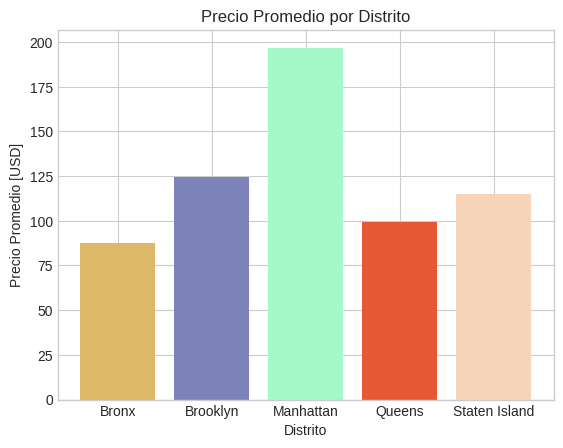

In [52]:
# Creación de figura y ejes
fig, ax = plt.subplots()

# Creación del gráfico de barras con colores personalizados
# Vuelve a utilizarse el diccionario de colores para cada distrito:
# inverted_district_colors
for i, distrito in enumerate(precio_prom.index):
    color = inverted_district_colors[distrito]
    ax.bar(i, precio_prom[distrito], color=color)

# Título y etiquetas para el gráfico
ax.set_title('Precio Promedio por Distrito')
ax.set_xlabel('Distrito')
ax.set_ylabel('Precio Promedio [USD]')

# Mostrar los nombres de los distritos en el eje X
ax.set_xticks(range(len(precio_prom.index)))
ax.set_xticklabels(precio_prom.index)

# Mostrar el gráfico
plt.show()

Según el promedio, los alquileres en Manhattan está bastante por encima de los demás distritos. Sin embargo, se observó una gran cantidad de valores anómalos, o outliers. Por lo tanto, para mayor profundidad al respecto puede estudiarse la distribución de estos precios en los distritos, o quizás analizando barrio por barrio.

Ahora se analiza 'price' en relación a su distribución en cada distrito (nghbhood_group).

In [53]:
# Cálculo de un arreglo de vectores para colocar en cada uno los
# precios correspondientes a cada distrito
precios_distrito = [df_abnb[df_abnb['nghbhood_group'] == distrito]['price'] for distrito in df_abnb['nghbhood_group'].unique()]

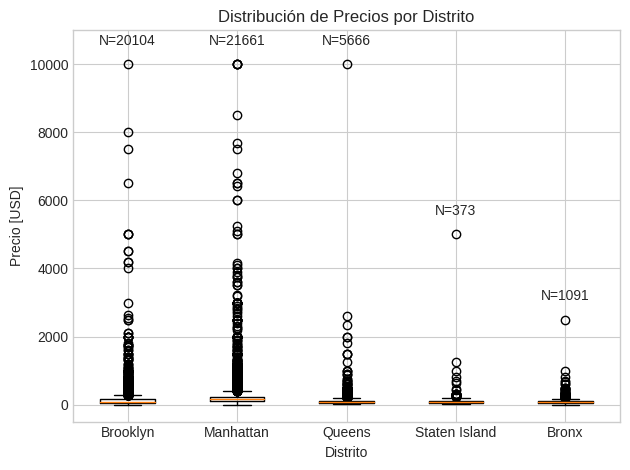

In [54]:
# Creación de figura y ejes
fig, ax = plt.subplots()

# Creación del gráfico boxplot
ax.boxplot(precios_distrito)
# Categorías en eje x
ax.set_xticklabels(df_abnb['nghbhood_group'].unique())
# Establecer título y etiquetas de los ejes
ax.set_title('Distribución de Precios por Distrito')
ax.set_xlabel('Distrito')
ax.set_ylabel('Precio [USD]')
# Ajustar rango máximo del eje y
ax.set_ylim(top=11000)
# Agregar etiquetas de cantidad de precios encima de cada boxplot
for i, precios in enumerate(precios_distrito):
    # Calcular la posición vertical
    y_pos = max(precios) + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.05
    # Agregar la etiqueta
    ax.text(i + 1, y_pos, f"N={len(precios)}", ha='center')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

Claramente existe una cuestión con los valores anómalos que debe estudiarse. En principio, pudiera tratarse de Airbnbs con valores anormalmente altos, ya sea por contar con mayor espacio o comodidades o una calidad superior de las mismas. No debe descartarse, de todos modos, que podría tratarse de datos erroneos.

Se buscarán las cantidades y proporciones de outliers.

In [55]:
# Recuento de precios y outliers en cada distrito
recuento_outliers = {}
recuento_precios = {}

# Iterar sobre cada categoría y sus precios correspondientes
for categoria, precios in zip(df_abnb['nghbhood_group'].unique(), precios_distrito):
    # Obtener los outliers de los precios
    boxplot_dict = ax.boxplot(precios, showfliers=True)
    outliers = boxplot_dict['fliers'][0].get_ydata()

    # Contar la cantidad de outliers
    recuento_outliers[categoria] = len(outliers)
    # Contar la cantidad de precios
    recuento_precios[categoria] = len(precios)

# Crear un DataFrame con los resultados
tabla_resultados = pd.DataFrame({'Grupo de Barrio': recuento_precios.keys(),
                                 'Cantidad de Precios': recuento_precios.values(),
                                 'Cantidad de Outliers': recuento_outliers.values()})

# Agregado de proporción de cantidad de outliers a cantidad de precios
tabla_resultados['Proporcion %'] = 100 * tabla_resultados['Cantidad de Outliers']/tabla_resultados['Cantidad de Precios']

# Imprimir la tabla de resultados
print(tabla_resultados)

  Grupo de Barrio  Cantidad de Precios  Cantidad de Outliers  Proporcion %
0        Brooklyn                20104                   996      4.954238
1       Manhattan                21661                  1289      5.950787
2          Queens                 5666                   322      5.683022
3   Staten Island                  373                    25      6.702413
4           Bronx                 1091                    61      5.591201


Se observa que los valores anómalos visualizados en los gráficos de cajas aparecen en proporciones de hasta el ~7 %. Estos porcentajes, en una primera aproximación, no resultan despreciables y deberán ser tratados en mayor profundidad mediante estrategias adecuadas.

Tentativamente, puede decirse que los % de outliers por distrito son similares, sugiriendo tal vez que en todos los casos existen Airbnbs considerablemente más caros que el general.

Tomando esto último como cierto, momentáneamente podrían descartarse los valores anómalos. De esta manera puede visualizarse las distribuciones de los precios más claramente.

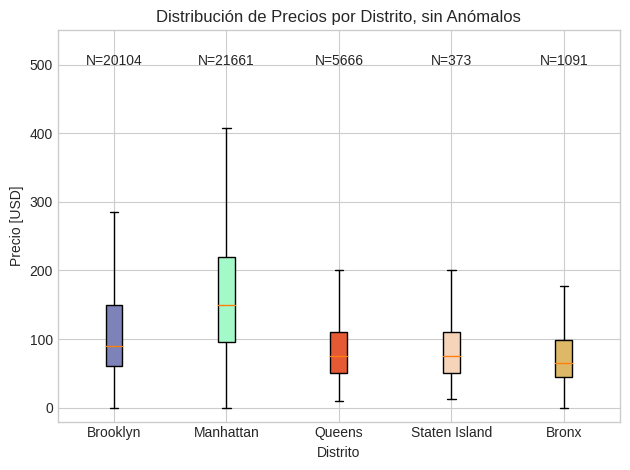

In [56]:
# Creación de figura y ejes
fig, ax = plt.subplots()

# Creación del gráfico boxplot sin mostrar outliers
# Usamos un bucle para crear cada boxplot con su color correspondiente
for i, distrito in enumerate(df_abnb['nghbhood_group'].unique()):
    precios_por_distrito = df_abnb[df_abnb['nghbhood_group'] == distrito]['price']
    color = inverted_district_colors[distrito]
    ax.boxplot(precios_por_distrito, positions=[i+1], showfliers=False, patch_artist=True, boxprops={'facecolor': color})

# Categorías en eje x
ax.set_xticklabels(df_abnb['nghbhood_group'].unique())
# Establecer título y etiquetas de los ejes
ax.set_title('Distribución de Precios por Distrito, sin Anómalos')
ax.set_xlabel('Distrito')
ax.set_ylabel('Precio [USD]')
# Ajustar rango máximo del eje y
ax.set_ylim(top=550)
# Etiquetas de cantidad de precios encima de cada boxplot
for i, precios in enumerate(precios_distrito):
    # Posición vertical ajustada
    y_pos = 500
    # Agregar la etiqueta
    ax.text(i + 1, y_pos, f"N={len(precios)}", ha='center')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

De las distribuciones sin valores anómalos se observa que Manhanttan presenta más del 50 % de sus precios por encima del tercer cuartil de los precios de los demás distritos. Este 50 % mencionado, y visualizado con la línea naranja en el boxplot, es la mediana. Se puede apreciar así que ésta es menos suceptible que el promedio que se usó al principio cuando se cuenta con valores anómalos.

Todo esto refuerza la idea de que Manhattan cuenta con precios más elevados, verificando la hipótesis.

##### Relación de precios y cantidad de noches, y precios y disponibilidad anual

Estas serían las columnas "price", "minimum_nights" y "availability_365".

Es decir, se pueden analizar las siguietes hipótesis:
- Existe una relación lineal negativa entre la duración mínima de la estadía requerida y el precio de alquiler.
- Existe una relación lineal negativa entre la disponibilidad anual de la propiedad y el precio de alquiler.
- Existe una relación lineal positiva entre la duración mínima de la estadía requerida y la disponibilidad anual de la propiedad.

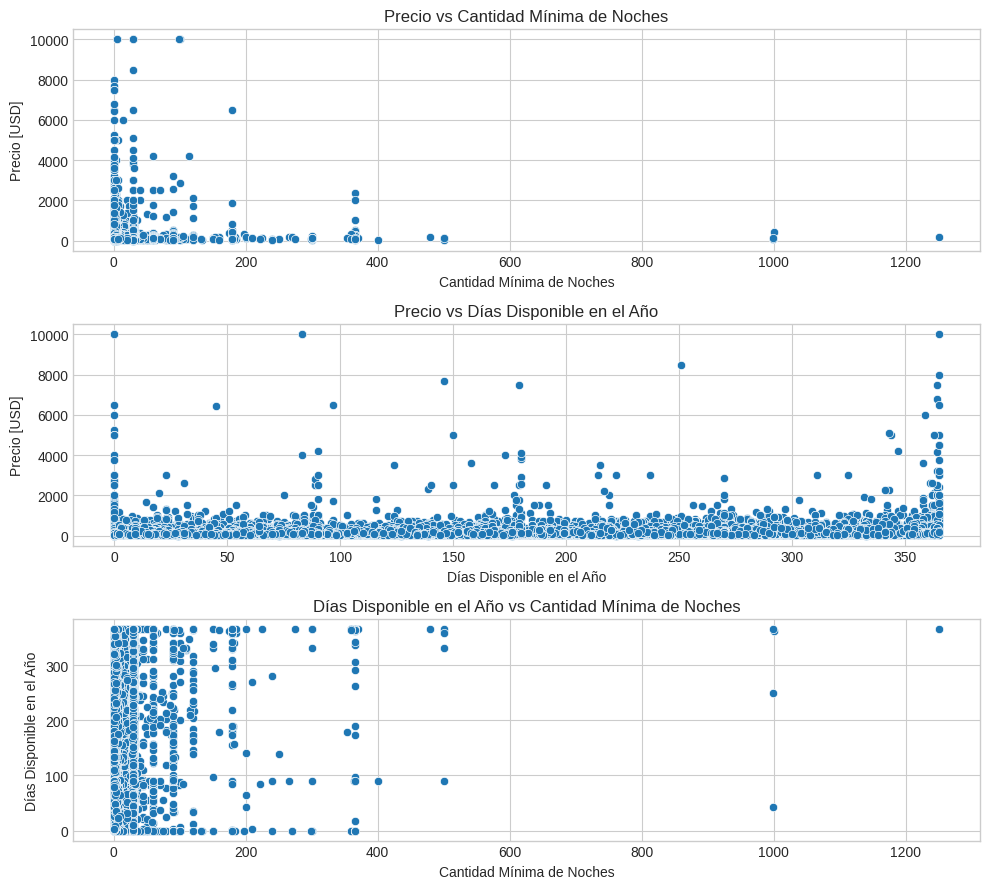

In [57]:
# Crear figura y ejes
fig, axes = plt.subplots(3, 1, figsize=(10, 9))
# Gráfico de "minimum_nights" vs "price"
sns.scatterplot(data=df_abnb, x="minimum_nights", y="price", ax=axes[0])
axes[0].set_title("Precio vs Cantidad Mínima de Noches")
axes[0].set_xlabel('Cantidad Mínima de Noches')
axes[0].set_ylabel('Precio [USD]')
# Gráfico de "availability_365" vs "price"
sns.scatterplot(data=df_abnb, x="availability_365", y="price", ax=axes[1])
axes[1].set_title("Precio vs Días Disponible en el Año")
axes[1].set_xlabel('Días Disponible en el Año')
axes[1].set_ylabel('Precio [USD]')
# Gráfico de "minimum_nights" vs "availability_365"
sns.scatterplot(data=df_abnb, x="minimum_nights", y="availability_365", ax=axes[2])
axes[2].set_title("Días Disponible en el Año vs Cantidad Mínima de Noches")
axes[2].set_xlabel('Cantidad Mínima de Noches')
axes[2].set_ylabel('Días Disponible en el Año')
# Ajustar espaciado entre los subplots
plt.tight_layout()
# Mostrar la figura
plt.show()

Realizando una inspección visual, no parece haber correlaciones lineales entre estas variables dispuestas en estos pares. Las hipótesis resultan entonces falsas.

#### Variable 'minimum_nights'

Se analiza la distribución de frecuencia de los valores de esta variable.

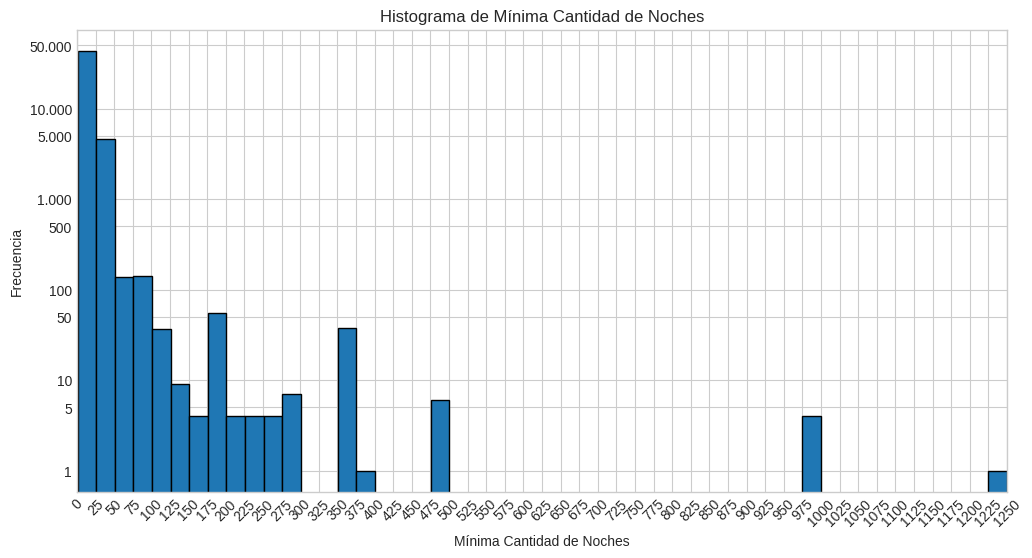

In [58]:
# Creación de la figura
plt.figure(figsize=(12, 6))
# Creación de un histograma
plt.hist(df_abnb['minimum_nights'], bins=50, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Mínima Cantidad de Noches')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Histograma de Mínima Cantidad de Noches')
# Límites del eje X
plt.xlim(0, 1250)
# Marcas del eje X
plt.xticks(range(0, 1251, 25), rotation=45)
# Límites del eje Y
#plt.ylim(0, 100000)
# Aplicación de escala logarítmica en Y
plt.yscale('log')
# Marcas del eje Y
plt.yticks([1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000], ['1', '5', '10', '50', '100', '500', '1.000', '5.000', '10.000', '50.000'])
# Mostrar el gráfico
plt.show()

Parecieran encontrarse en su mayoría entre 0 y 100, por lo que se analiza más de cerca ese rango.

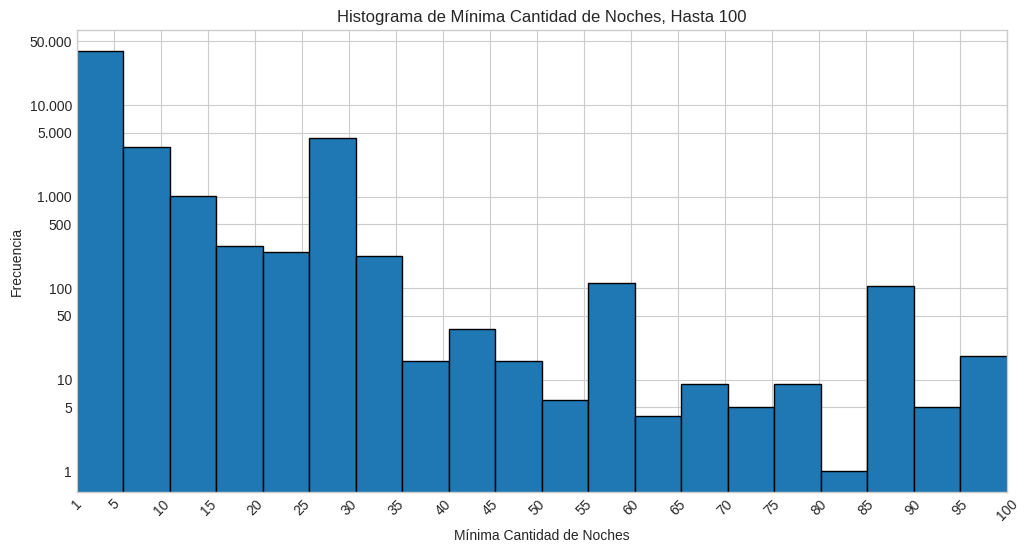

In [59]:
# Creación de la figura
plt.figure(figsize=(12, 6))
# Creación de un histograma
plt.hist(df_abnb['minimum_nights'].loc[df_abnb['minimum_nights'] <= 100], bins=20, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Mínima Cantidad de Noches')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Histograma de Mínima Cantidad de Noches, Hasta 100')
# Límites del eje X
plt.xlim(1, 100)
# Marcas del eje X
plt.xticks([1,5]+list(range(10, 101, 5)), rotation=45)
# Límites del eje Y
#plt.ylim(0, 100000)
# Aplicación de escala logarítmica en Y
plt.yscale('log')
# Marcas del eje Y
plt.yticks([1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000], ['1', '5', '10', '50', '100', '500', '1.000', '5.000', '10.000', '50.000'])
# Mostrar el gráfico
plt.show()

Seguidamente, se analiza la distribución estadística de la variable.

Text(0.5, 1.0, 'Distribución de Mínima Cantidad de Noches')

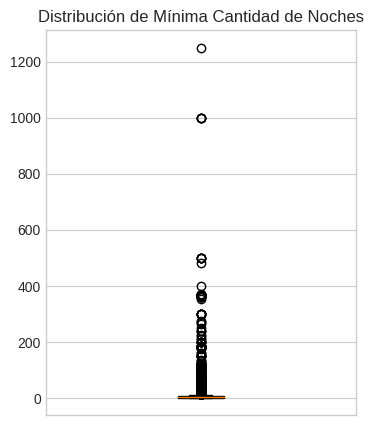

In [60]:
# Creación de la figura
plt.figure(figsize=(4, 5))
# Creación de un boxplot
plt.boxplot(df_abnb['minimum_nights'])
# Eliminación de etiquetas en X
plt.xticks([])
# Agregar un título
plt.title('Distribución de Mínima Cantidad de Noches')

Se remueven los valores anómalos, para poder apreciar mejor la distribución.

Text(0.5, 1.0, 'Distribución de Mínima Cantidad\nde Noches, sin Anómalos')

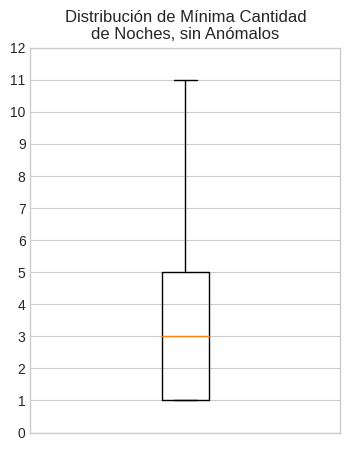

In [61]:
# Creación de la figura
plt.figure(figsize=(4, 5))
# Creación de un boxplot
plt.boxplot(df_abnb['minimum_nights'], showfliers=False)
# Marcas del eje Y
plt.yticks(range(0, 13, 1))
# Eliminación de etiquetas en X
plt.xticks([])
# Agregar un título
plt.title('Distribución de Mínima Cantidad\nde Noches, sin Anómalos')

#### Variable 'last_review'

Es decir, la fecha de la última reseña que recibió el Airbnb.

Se investiga la hipótesis que las últimas reseñas deben datar de los días o meses próximos a la fecha del dataset.

In [62]:
print('La última reseña más reciente es de: ', df_abnb.last_review.max())
print('La última reseña más antiguo es de: ', df_abnb.last_review.min())

La última reseña más reciente es de:  2019-07-08 00:00:00
La última reseña más antiguo es de:  2011-03-28 00:00:00


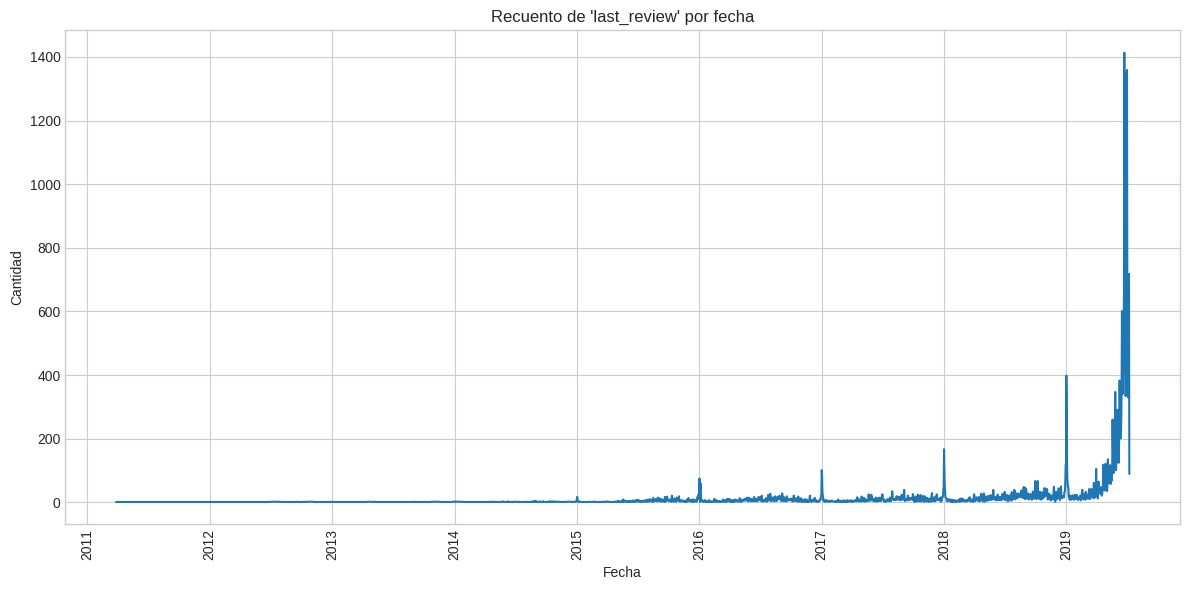

In [63]:
# Obtener el recuento de cada valor único en la columna "last_review"
review_counts = df_abnb["last_review"].value_counts().sort_index()

# Crear un gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x=review_counts.index, y=review_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.title("Recuento de 'last_review' por fecha")
plt.tight_layout()
plt.show()

Esto muestra que, en algunos casos, no se recibieron reseñas por varios años, contradiciendo la hipótesis. Esto podría deberse a inactividad en determinados sitios para alquilar.

Por otro lado, curiosamente, se observan picos de últimas reseñas en los cambios de año. Es posible que se trate de aumento en la cantidad de reseñas en épocas de las fiestas; una cierta estacionalidad de alquileres. Otra opción podría ser una mala asignación de fechas, por ejemplo que cuente solamente con el año, y que por defecto se compute como un comentario dejado a principios de año.

#### Variable 'no_of_reviews'




Es decir, la cantidad de reseñas que recibió cada Airbnb.

Se parte de la hipótesis de que la cantidad de reseñas recibidas por propiedad suele ser un valor bajo.

<Figure size 1000x600 with 0 Axes>

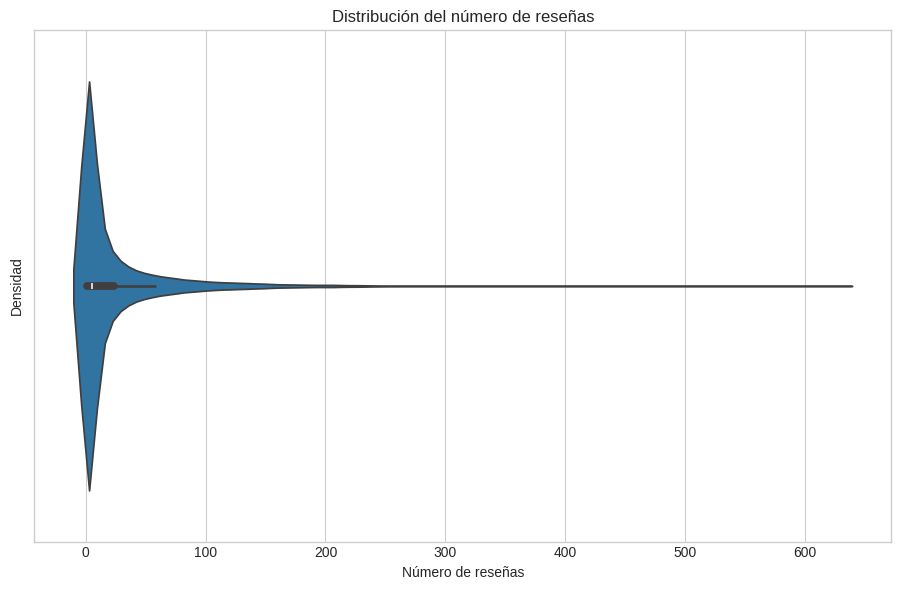

In [64]:
# Crear un gráfico de violín
plt.figure(figsize=(10, 6))
sns.catplot(data=df_abnb, x="no_of_reviews", kind="violin", height=6, aspect=1.5)
plt.xlabel("Número de reseñas")
plt.ylabel("Densidad")
plt.title("Distribución del número de reseñas")

# Agregar el marco
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

plt.tight_layout()
plt.show()

Visualmente puede observarse que una gran cantidad de propiedades cuenta con una cantidad de reseñas relativamente baja, posiblemente por debajo de las 30 o 40. A pesar de ello, la extensión del violín hacia la derecha habla de valores anómalos presentes. Estos también se evidencian al ver el pequeño boxplot negro embebido en el violín.

Seguidamente, se estudia estadísticamente la distribución de la varible, focalizándonse en gráficos de boxplot.

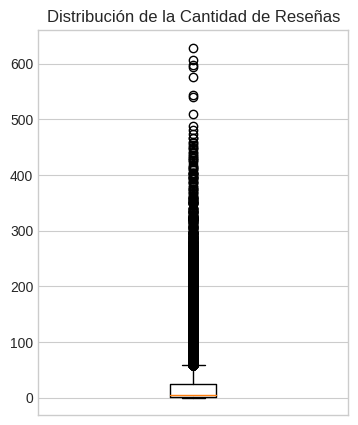

In [65]:
# Creación de la figura
plt.figure(figsize=(4, 5))
# Creación de un boxplot
plt.boxplot(df_abnb['no_of_reviews'])
# Eliminación de etiquetas en X
plt.xticks([])
# Agregar un título
plt.title('Distribución de la Cantidad de Reseñas')
plt.show()

Aquí quedan de manifiesto los valores anómalos de una forma mucho más clara.

Para apreciar mejor el boxplot y lo que representa, se vuelve a generar el gráfico, pero ocultando los valores anómalos.

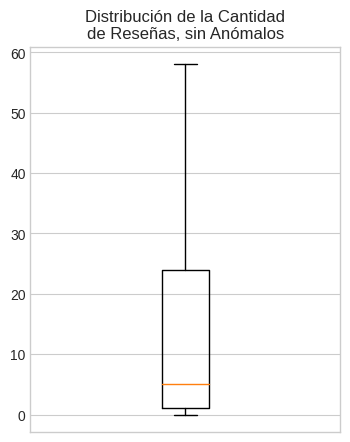

Q2 (mediana): 5.0
Q3 (tercer cuartil): 24.0


In [66]:
# Creación de la figura
plt.figure(figsize=(4, 5))
# Creación de un boxplot
boxplot_data = plt.boxplot(df_abnb['no_of_reviews'], showfliers=False)
# Eliminación de etiquetas en X
plt.xticks([])
# Agregar un título
plt.title('Distribución de la Cantidad\nde Reseñas, sin Anómalos')

# Obtener los valores de Q2 y Q3
q2 = boxplot_data['medians'][0].get_ydata()[0]
q3 = boxplot_data['boxes'][0].get_ydata()[2]

plt.show()

# Imprimir los valores
print(f"Q2 (mediana): {q2}")
print(f"Q3 (tercer cuartil): {q3}")

A la luz de este gráfico, resulta claro que los Airbnbs cuentan usualmente con pocas reseñas. En la mitad de los casos, cinco reseñas o menos. En tres cuartos de los casos, veinticuatro reseñas o menos.

De esta forma, se verifica la hipótesis.

Aún así, cabe hacer el siguiente comentario: esta cantidad de reseñas no evidencia el paso del tiempo. Es decir, si un Airbnb lleva en la plataforma desde hace años, es mucho más probable que haya recibido más reseñas que uno que recién fue publicado.

En ese sentido, la siguiente variable podría desvelar un poco más qué Airbnbs suelen recibir más o menos reseñas.

#### Variable 'reviews_month'

Esta variable es la cantidad de reseñas por mes que recibe un Airbnb. Se observa su distribución de frecuencias.

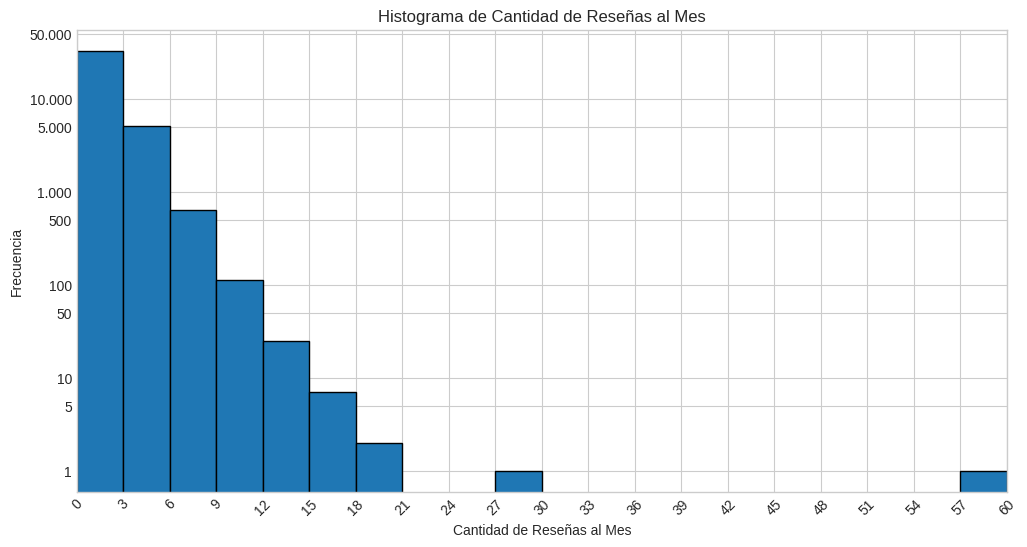

In [67]:
# Creación de la figura
plt.figure(figsize=(12, 6))
# Creación de un histograma con bins alineados con los xticks
bins = range(0, 61, 3)
plt.hist(df_abnb['reviews_month'], bins=bins, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Cantidad de Reseñas al Mes')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Histograma de Cantidad de Reseñas al Mes')
# Límites del eje X
plt.xlim(0, 60)
# Marcas del eje X
plt.xticks(bins, rotation=45)
# Aplicación de escala logarítmica en Y
plt.yscale('log')
# Marcas del eje Y
plt.yticks([1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000], ['1', '5', '10', '50', '100', '500', '1.000', '5.000', '10.000', '50.000'])
# Mostrar el gráfico
plt.show()

Parece haber más casos que reciben hasta 6 reseñas por mes, por lo que se hace foco en ese rango.

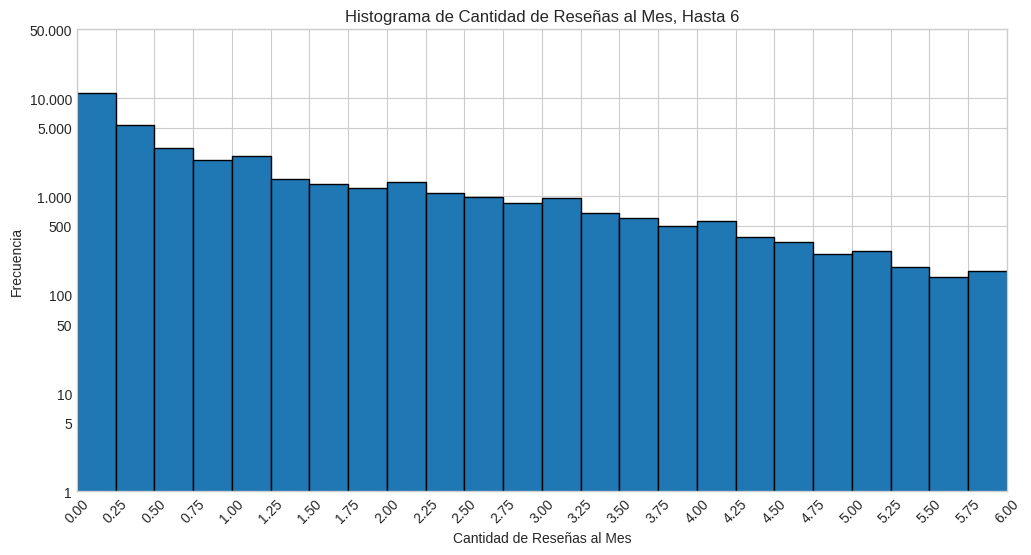

In [68]:
# Creación de la figura
plt.figure(figsize=(12, 6))
# Creación de un histograma con bins alineados con los xticks
bins = np.arange(0, 6.24, 0.25)
plt.hist(df_abnb['reviews_month'].loc[df_abnb['reviews_month'] <= 6], bins=bins, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Cantidad de Reseñas al Mes')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Histograma de Cantidad de Reseñas al Mes, Hasta 6')
# Límites del eje X
plt.xlim(0, 6)
# Marcas del eje X
plt.xticks(bins, rotation=45)
# Aplicación de escala logarítmica en Y
plt.yscale('log')
# Marcas del eje Y
plt.yticks([1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000], ['1', '5', '10', '50', '100', '500', '1.000', '5.000', '10.000', '50.000'])
# Mostrar el gráfico
plt.show()

Por observación visual, la frecuencia parecería decrecer aproximadamente de forma exponencial para mayores cantidades de reseña por mes.

Se plantea un gráfico de violín para ver la distribución estadística, que lo hará mostrando la densidad de datos de forma más detallada.



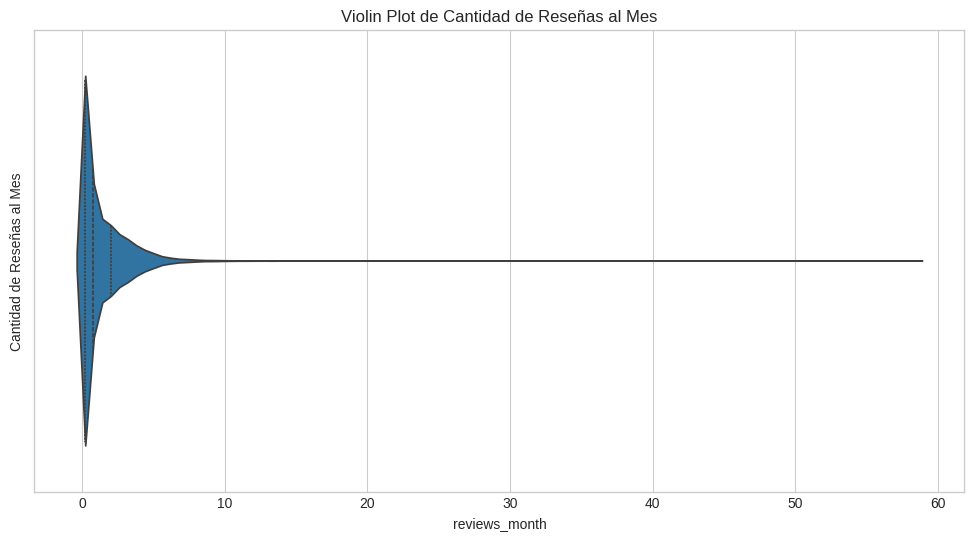

In [69]:
# Creación de la figura
plt.figure(figsize=(12, 6))
# Creación del violin plot
sns.violinplot(data=df_abnb,
               x='reviews_month',
               inner='quartile',  # Mostrar los cuartiles dentro del violín
               density_norm='width',  # Ajustar el ancho del violín al número de datos
              )

# Etiquetado del eje Y
plt.ylabel('Cantidad de Reseñas al Mes')
# Agregar un título
plt.title('Violin Plot de Cantidad de Reseñas al Mes')
# Mostrar el gráfico
plt.show()

Se acota el rango y se facilita la visualización del boxplot dentro del violín.

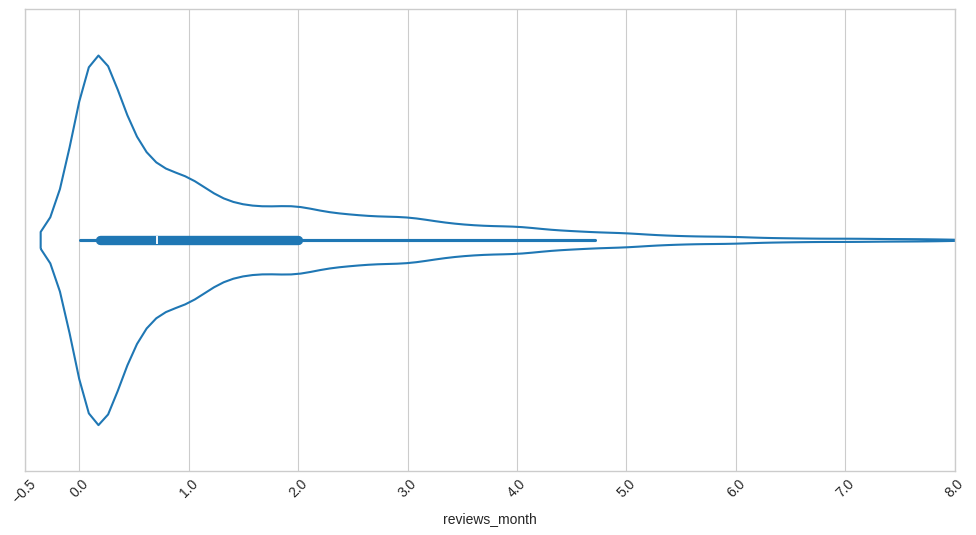

In [70]:
# Creación de la figura
plt.figure(figsize=(12, 6))
#
sns.violinplot(data=df_abnb[df_abnb['reviews_month'] <= 8], x='reviews_month', fill=False)
# Límites del eje X
plt.xlim(-0.5, 6)
# Marcas del eje X
plt.xticks([-0.5]+list(range(0, 9, 1)), rotation=45)
# Mostrar el gráfico
plt.show()

Por lo que puede apreciarse, realmente lo más frecuente es que los Airbnb reciban menos de una reseña por mes. Esto se pone de manifiesto gracias al boxplot azul embebido en el violín. La pequeña línea blanca representa la mediana, y se ve que se halla aproximadamente en 0.7.

#### Variable 'calc_hlstngs_count'

En primera instancia, se muestra la frecuencia de ocurrencia de cada valor de esta variable.

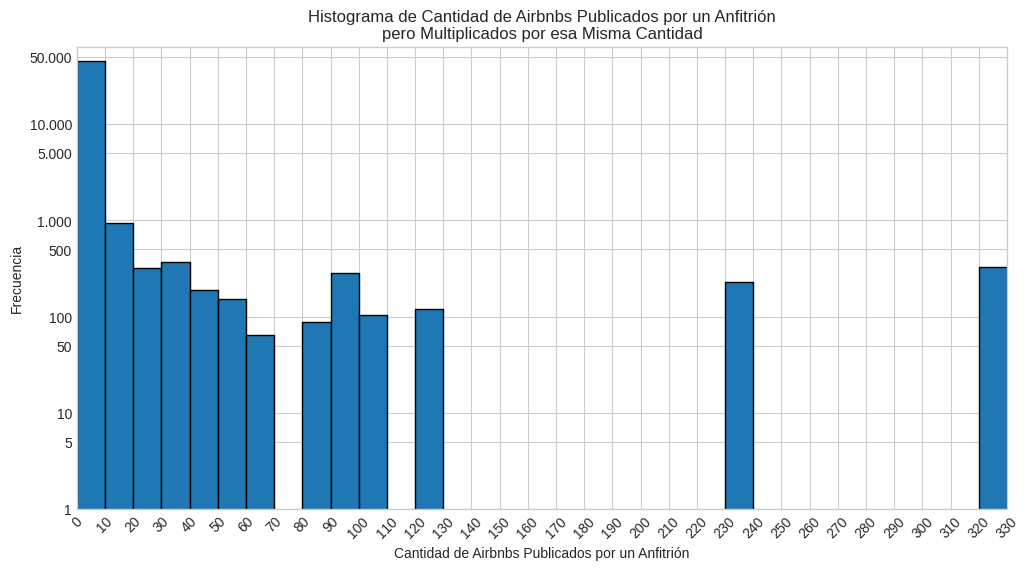

In [71]:
# Creación de la figura
plt.figure(figsize=(12, 6))
# Creación de un histograma con bins alineados con los xticks
bins = range(0, 331, 10)
plt.hist(df_abnb['calc_hlstngs_count'], bins=bins, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Cantidad de Airbnbs Publicados por un Anfitrión')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Histograma de Cantidad de Airbnbs Publicados por un Anfitrión\npero Multiplicados por esa Misma Cantidad')
# Límites del eje X
plt.xlim(1, 330)
# Marcas del eje X
plt.xticks(bins, rotation=45)
# Aplicación de escala logarítmica en Y
plt.yscale('log')
# Marcas del eje Y
plt.yticks([1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000], ['1', '5', '10', '50', '100', '500', '1.000', '5.000', '10.000', '50.000'])
# Mostrar el gráfico
plt.show()

Este gráfico no muestra cuántas veces sucede que un mismo anfitrión publique varios Airbnbs. Por ejemplo, sólo uno publicó 327. Sin embargo, como 'calc_hlstngs_count' vale 327 en ese caso, pero también aparece en 327 registros, la frecuencia termina siendo 327, en lugar de 1 (un sólo anfitrión).

Para saber con qué frecuencia se publican una cierta cantidad de Airbnbs por un mismo anfitrión, debe procederse como sigue.

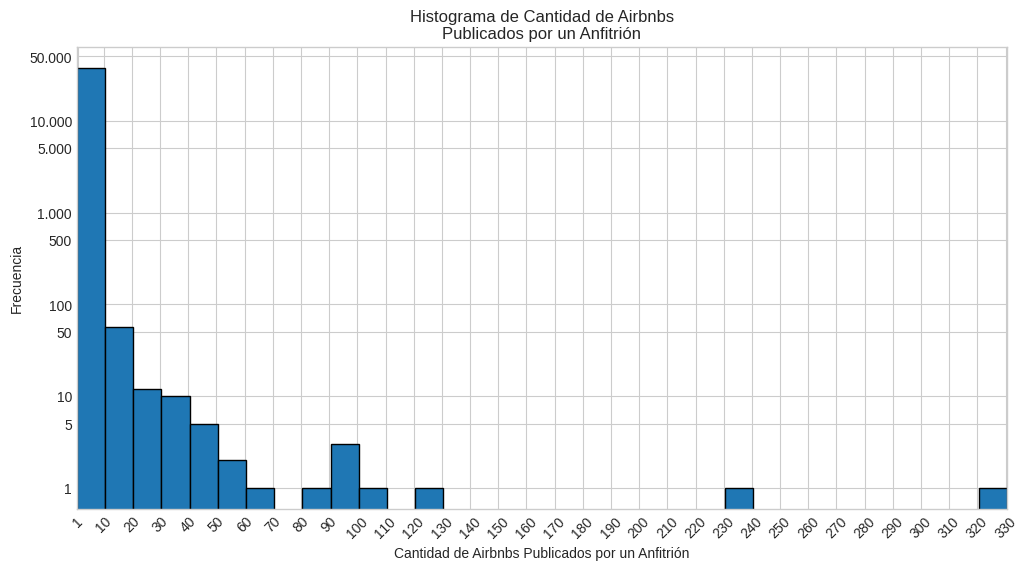

In [72]:
# Agrupa el DataFrame por host_id y cuenta la cantidad de calc_hlstngs_count para cada host_id
host_counts = df_abnb.groupby('host_id')['calc_hlstngs_count'].count()
# Crea la figura
plt.figure(figsize=(12, 6))
# Crea el histograma
bins = np.arange(0.5, 331, 10)
plt.hist(host_counts, bins=bins, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Cantidad de Airbnbs Publicados por un Anfitrión')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Histograma de Cantidad de Airbnbs\nPublicados por un Anfitrión')
# Límites del eje X
plt.xlim(0.5, 330.5)
# Marcas del eje X
plt.xticks([1]+list(np.arange(10, 331, 10)), rotation=45)
# Aplicación de escala logarítmica en Y
plt.yscale('log')
# Marcas del eje Y
plt.yticks([1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000], ['1', '5', '10', '50', '100', '500', '1.000', '5.000', '10.000', '50.000'])
# Mostrar el gráfico
plt.show()

El caso de los 327, aquí se verifica que su frecuencia es 1, como corresponde.

Ahora, se hace foco entre 1 y 20 para la cantidad de Airbnbs publicados por un mismo anfitrión.

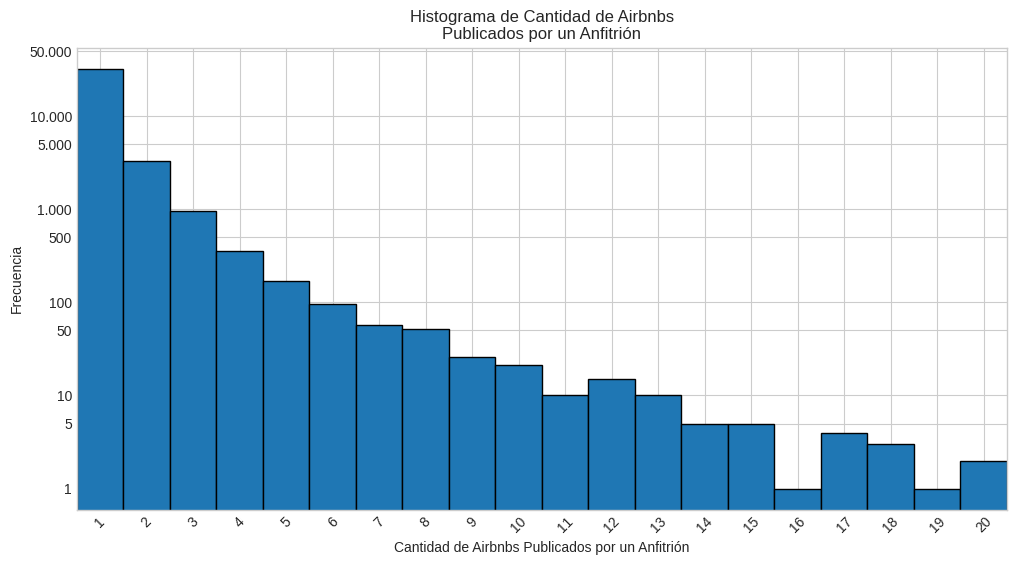

In [73]:
# Agrupa el DataFrame por host_id y cuenta la cantidad de calc_hlstngs_count para cada host_id
host_counts = df_abnb.groupby('host_id')['calc_hlstngs_count'].count()
# Crea la figura
plt.figure(figsize=(12, 6))
# Crea el histograma
bins = np.arange(0.5, 22, 1)
plt.hist(host_counts[host_counts <= 20], bins=bins, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Cantidad de Airbnbs Publicados por un Anfitrión')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Histograma de Cantidad de Airbnbs\nPublicados por un Anfitrión')
# Límites del eje X
plt.xlim(0.5, 20.5)
# Marcas del eje X
plt.xticks(np.arange(1, 21, 1), rotation=45)
# Aplicación de escala logarítmica en Y
plt.yscale('log')
# Marcas del eje Y
plt.yticks([1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000], ['1', '5', '10', '50', '100', '500', '1.000', '5.000', '10.000', '50.000'])
# Mostrar el gráfico
plt.show()

Hipótesis: la cantidad de Airbnbs publicados en Nueva York por un mismo anfitrión se condice entre la cantidad de registros en donde este anfitrión aparece y el valor de 'calc_hlstngs_count'.

En primera instancia, se muestra cada anfitrión único (es decir, valores únicos de 'host_name'), y el valor máximo entre todos los asociados en 'calc_hlstngs_count'. Esto se realiza mediante una agregación del 'host_id'.

In [74]:
df_abnb.groupby('host_id').agg({'host_name':'first', 'calc_hlstngs_count':'max'}).sort_values(by='calc_hlstngs_count', ascending=False).head(15)

host_name  calc_hlstngs_count
host_id                                         
219517861       Sonder (NYC)                 327
107434423         Blueground                 232
30283594                Kara                 121
137358866             Kazuya                 103
16098958      Jeremy & Laura                  96
12243051              Sonder                  96
61391963   Corporate Housing                  91
22541573                 Ken                  87
200380610            Pranjal                  65
1475015                 Mike                  52
7503643                 Vida                  52
120762452            Stanley                  50
2856748                Ruchi                  49
205031545         Red Awning                  49
190921808               John                  47

En la siguiente agregación, también mediante 'host_id', se muestra el nombre del anfitrión ('host_name') y se cuenta cuántos registros aparecen para este anfitrión.

In [75]:
df_abnb.groupby('host_id').agg({'host_name':'first', 'calc_hlstngs_count':'count'}).sort_values(by='calc_hlstngs_count', ascending=False).head(15)

host_name  calc_hlstngs_count
host_id                                         
219517861       Sonder (NYC)                 327
107434423         Blueground                 232
30283594                Kara                 121
137358866             Kazuya                 103
16098958      Jeremy & Laura                  96
12243051              Sonder                  96
61391963   Corporate Housing                  91
22541573                 Ken                  87
200380610            Pranjal                  65
1475015                 Mike                  52
7503643                 Vida                  52
120762452            Stanley                  50
2856748                Ruchi                  49
205031545         Red Awning                  49
190921808               John                  47

Seguidamente, se comparan las dos agregaciones. Esto debería resultar en un DataFrame con dos columnas y usando de índice a 'host_id'. Ambas columnas deberían tener en su totalidad valores True. De ser así, se podría decir que para cada 'host_id' y 'host_name', se verifica que 'calc_hlstngs_count' refleja la cantidad de Airbnbs que publicó par alquilar.

In [76]:
column_names = ['host_name', 'calc_hlstngs_count']

comparison_result = (df_abnb.groupby('host_id').agg({'host_name':'first', 'calc_hlstngs_count':'max'}).sort_values(by='calc_hlstngs_count', ascending=False) ==
 df_abnb.groupby('host_id').agg({'host_name':'first', 'calc_hlstngs_count':'count'}).sort_values(by='calc_hlstngs_count', ascending=False))

for column in column_names:
    print(f"Columna {column}: {comparison_result[column].all()}")

Columna host_name: False
Columna calc_hlstngs_count: True


En primera instancia, mediante ambas agregaciones se comprueba que el valor que un mismo anfitrión ('host_id') presenta en la variable 'calc_hlstngs_count' indica efectivamente cuántos Airbnbs tiene publicados en Nueva York.

Por otro lado, resulta llamativo que la columna 'host_name' devuelva Falsa, y se investiga a continuación.

Se extraen los registros para los que resultó falsa la comparación en la columna 'host_name'.

In [77]:
false_host_ids = comparison_result[comparison_result['host_name'] == False].sort_index()

In [78]:
false_host_ids

host_name  calc_hlstngs_count
host_id                                 
415290         False                True
526653         False                True
919218         False                True
5162530        False                True
5300585        False                True
7779204        False                True
7822683        False                True
23077718       False                True
24576978       False                True
26138712       False                True
32722063       False                True
33134899       False                True
39608626       False                True
100971588      False                True
119609345      False                True
159156636      False                True
177146433      False                True
228750026      False                True

In [79]:
false_host_ids.shape

(18, 2)

Habiendo obtenido cuáles son los valores de 'host_id' para los que se da esta condición, se los utiliza para extraer su nombre del DataFrame con todos los datos: df_abnb.

In [80]:
for host_id in false_host_ids.index:
  print(f'Anfitrión con ID {host_id}, se observa:')
  print(df_abnb[df_abnb['host_id'] == host_id][['host_id', 'host_name']])
  print('\n')

Anfitrión con ID 415290, se observa:
          host_id host_name
id                         
21787094   415290       NaN


Anfitrión con ID 526653, se observa:
        host_id host_name
id                       
100184   526653       NaN


Anfitrión con ID 919218, se observa:
         host_id host_name
id                        
4183989   919218       NaN


Anfitrión con ID 5162530, se observa:
         host_id host_name
id                        
6992973  5162530       NaN


Anfitrión con ID 5300585, se observa:
          host_id host_name
id                         
12113879  5300585       NaN


Anfitrión con ID 7779204, se observa:
         host_id host_name
id                        
1449546  7779204       NaN


Anfitrión con ID 7822683, se observa:
          host_id host_name
id                         
10709846  7822683       NaN


Anfitrión con ID 23077718, se observa:
          host_id host_name
id                         
4446862  23077718       NaN


Anfitrión con ID 24576978

Se observa que todos los False de la comparación provienen de no estar definido el nombre del anfitrión, o 'host_id'. Por definición del objeto NaN, la comparación lógica de igualdad entre dos de ellos resulta en un False.

#### Variable 'availability_365'

En primera instancia se observa la distribución de la frecuencia en los valores de 'availability_365'.

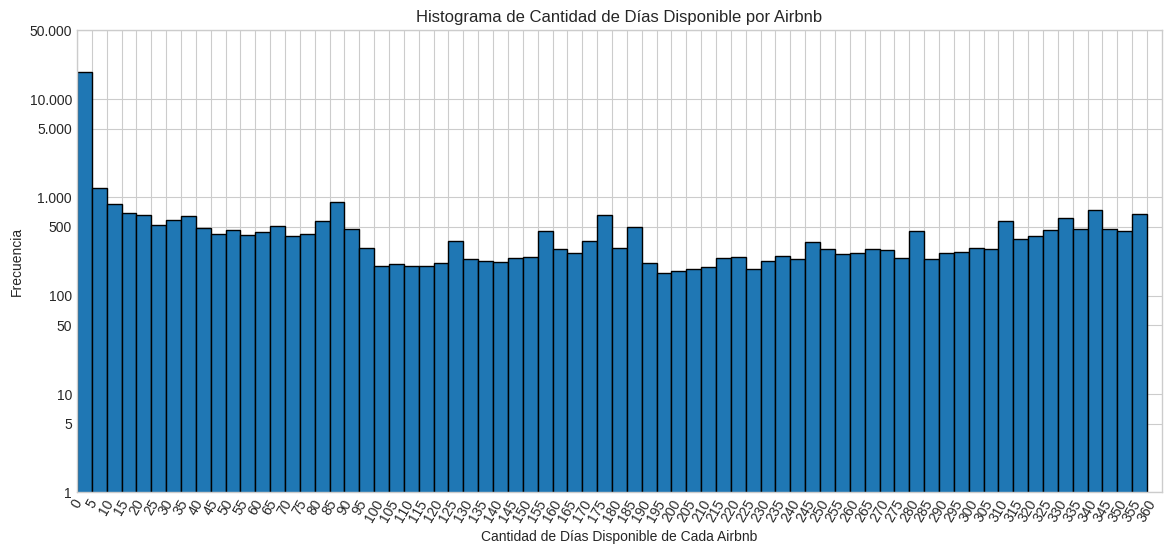

In [81]:
# Creación de la figura
plt.figure(figsize=(14, 6))
# Creación de un histograma con bins alineados con los xticks
bins = range(0, 365, 5)
plt.hist(df_abnb['availability_365'], bins=bins, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Cantidad de Días Disponible de Cada Airbnb')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Histograma de Cantidad de Días Disponible por Airbnb')
# Límites del eje X
plt.xlim(0, 365)
# Marcas del eje X
plt.xticks(bins, rotation=60)
# Aplicación de escala logarítmica en Y
plt.yscale('log')
# Marcas del eje Y
plt.yticks([1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000], ['1', '5', '10', '50', '100', '500', '1.000', '5.000', '10.000', '50.000'])
# Mostrar el gráfico
plt.show()

Se observa en más detalle en el rango entre 0 y 10.

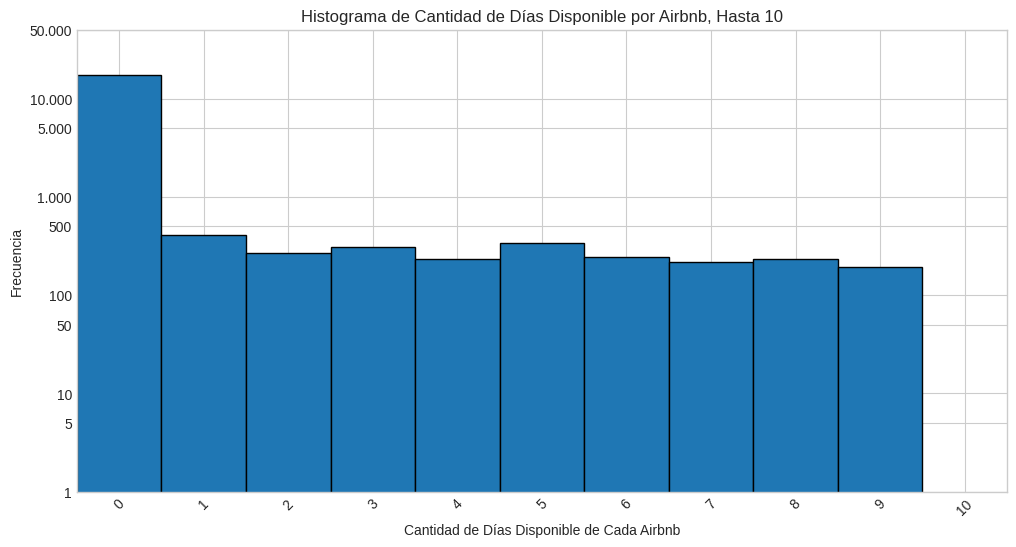

In [82]:
# Crea la figura
plt.figure(figsize=(12, 6))
# Crea el histograma
bins = np.arange(-0.5, 10.5, 1)
plt.hist(df_abnb['availability_365'].loc[df_abnb['availability_365'] <= 10], bins=bins, edgecolor='black')
# Etiquetado de los ejes
plt.xlabel('Cantidad de Días Disponible de Cada Airbnb')
plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Histograma de Cantidad de Días Disponible por Airbnb, Hasta 10')
# Límites del eje X
plt.xlim(-0.5, 10.5)
# Marcas del eje X
plt.xticks(np.arange(0, 11, 1), rotation=45)
# Aplicación de escala logarítmica en Y
plt.yscale('log')
# Marcas del eje Y
plt.yticks([1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000], ['1', '5', '10', '50', '100', '500', '1.000', '5.000', '10.000', '50.000'])
# Mostrar el gráfico
plt.show()

Curiosamente, la cantidad de días disponibles al año con mayor frecuencia es cero.

In [83]:
# Cuántas veces aprece el valor 0
df_abnb['availability_365'].loc[df_abnb['availability_365'] == 0].value_counts()

availability_365
0    17533
Name: count, dtype: int64

In [84]:
# Cuál es el valor máximo de esta variable
df_abnb['availability_365'].max()

365

Llama la atención que una cantidad tan grande de Airbnbs esté publicada, y por ende que uno pueda encontarla al buscar en la plataforma, pero que no esté disponible ningún día del año.

Se considera posible que se trate de errores de tipeo, o algún error en la recolección de este valor. Las opciones son múltiples, pero debe indagarse más a fondo, comunicándose este hallazgo al equipo encargado de crear este conjunto de datos.

Ahora se grafica un boxplot para observar la distribución estadística de esta variable.

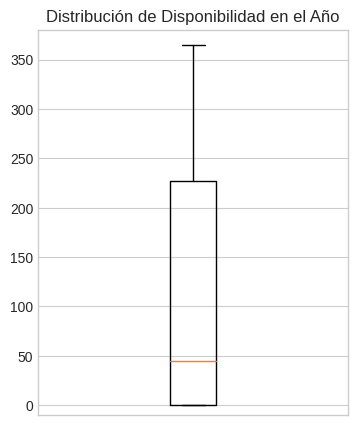

In [85]:
# Crea la figura
plt.figure(figsize=(4, 5))
# Crea el boxplot
plt.boxplot(df_abnb['availability_365'])
# Agrega las etiquetas al eje X
#plt.xticks([1, 2], ['Total', 'Reducido'])
# Eliminación de etiquetas en X
plt.xticks([])
# Ajusta el rango del eje Y
plt.ylim(-10, 380)
# Etiquetado de los ejes
#plt.xlabel('Mínima Cantidad de Noches')
#plt.ylabel('Frecuencia')
# Agregar un título
plt.title('Distribución de Disponibilidad en el Año')
plt.show()

Pareciera que tener tantos registros en 0 causa que el primer cuartil se encuentre en ese mismo valor. Condiciéndose con lo que se ve en el histograma, no se observan valores anómalos.

## Primeros Comentarios

Hasta aquí, pudieron observarse algunas características del dataset. Por ejemplo, hay barrios y distritos que cuentan con mayor cantidad de Airbnbs, como Manhattan y Brooklyn. Por otro lado, estos mismos presentan precios promedio más elevados. Adicionalmente, hay un tipo de propiedad que se ofrece, respecto de las otras dos, en mucho menor cantidad: las habitaciones compartidas. Asimismo, parece razonable descartar relación lineal entre las variables "price", "minimum_nights" y "availability_365" tomadas de a pares. Finalmente, se analizó de cuándo datan las últimas reseñas que recibieron las propiedades, y cómo se distribuyen las reseñas en general en su cantidad por propiedad.

A continuación, se procede a implementar un modelo de regresión que permita estimar el precio de alquiler de un Airbnb basándose en otras variables presentes en el dataset.

## Relaciones Entre Variables

Se aplicará "label encoding" para continuar estudiando las variables. De esta forma, las variables categóricas reciben un valor numérico y pueden utilizarse en modelos predictivos que se alimentan con números.

Dado que el objetivo es, en última instancia, predecir los precios de los Airbnbs en función de otras variables, se comienza desde aquí a separar la variable objetivo de las independientes.

In [ ]:
# Estas son todas las variables (o campos, o columnas)
df_abnb.columns

Index(['name', 'host_id', 'host_name', 'nghbhood_group', 'nghbhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'no_of_reviews', 'last_review', 'reviews_month', 'calc_hlstngs_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Separación en variables independientes y variable objetivo
X_ini = df_abnb[['nghbhood_group', 'nghbhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'no_of_reviews', 'reviews_month', 'calc_hlstngs_count', 'availability_365']]
y_ini = df_abnb['price']

In [ ]:
# Codificación de variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()
X_codif_etiq = X_ini.copy()
for col in X_codif_etiq.columns:
    if X_codif_etiq[col].dtype == 'object':
        X_codif_etiq[col] = label_encoder.fit_transform(X_codif_etiq[col])

Seguidamente, se analiza la correlación entre variables que serán parte del estudio mediante un modelo predictivo. Para ello se consideran todas, incluyendo la que es objetivo.

In [ ]:
# Combinar en un DataFrame todas las variables que serán parte del estudio
df_pairplot = pd.concat([X_codif_etiq, y_ini, df_abnb['last_review']], axis=1)
# Pairplot incluyendo 'price'
sns.pairplot(df_pairplot, diag_kind='kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Se intenta describir mejor las relaciones entre variables por medio de la matriz de correlación.

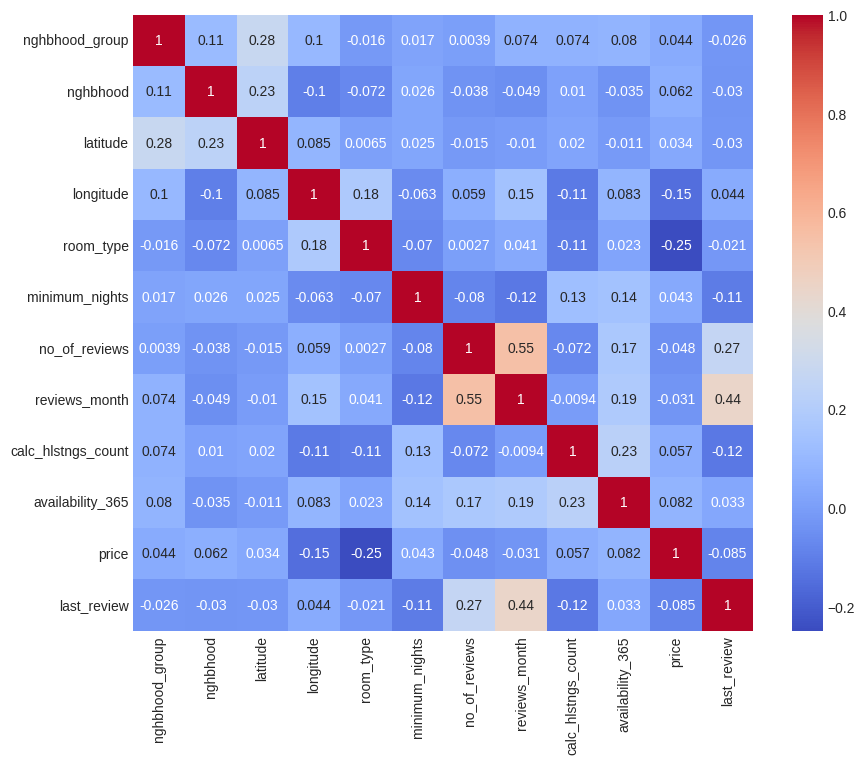

In [ ]:
# Matriz de correlaciones
correlation_matrix = df_pairplot.corr()
# Creación de la figura
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Si se observa la fila de price, o su columna si se prefiere, y la intersección con las demás variables, puede empezarse a ver que no hay una correlación lineal muy marcada entre ninguna variable y la objetivo.

En base a todo esto, parecería que un modelo lineal no será realmente capaz de predecir la variable 'price', como se busca hacer.

## Implementación de Modelos

### Bibliotecas

Aquí se importarán distintas funciones de una serie de módulos, todos pertenecientes a la biblioteca Scikit-Learn.

<font size=+1>Canalizaciones</font>

In [ ]:
from sklearn.pipeline import Pipeline

<font size=+1>Preprocesamiento</font>

Normalización y Escalado:

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

Características polinomiales:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Imputación de Valores Perdidos:

In [ ]:
from sklearn.impute import SimpleImputer

<font size=+1>Modelos de Regresión</font>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

<font size=+1>Selección de Modelos</font>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

<font size=+1>Selección de Características</font>

In [ ]:
from sklearn.feature_selection import RFE

<font size=+1>Métricas</font>

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Por otro lado:

In [ ]:
# Que al imprimir no trunque filas, y siga imprimiendo hacia la derecha,
# fuera de la pantalla de ser necesario
pd.set_option('display.width', None)

Para todo lo que se hará a continuación, se trabajará dividiendo el conjunto de datos en dos subconjuntos:
- Entrenamiento (train), con un 80 % de los registros.
- Prueba (test), con un 20 % de los registros.

In [ ]:
# Separación en subconjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_codif_etiq, y_ini, test_size=0.2, random_state=666)

### Regresión Lineal

De aquí en adelante se trabajará con canalizaciones en las que se implementará búsqueda en cuadrícula. Es decir, se calculará iterativamente cuál es la mejor combinación de pasos (en steps) y de parámetros (en grid_param).


Así, se contará con un imputador, ya que algunos modelos (como la regresión lineal) no pueden manejar valores nulos tipo NaN. De este modo, dichos valores serán remplazados por la mediana de la variable.


Luego, los datos serán preprocesados por un normalizador o un escalador, de manera de moderar el mayor peso de una variable sólo por tener valores absolutos mayores que los de otra variable. Se utilizará:
- StandardScaler(): estandarización; los datos tendrán media 0 y desviación estándar 1.
- MinMaxScaler(): escalado mínimo-máximo; los datos tendrán valores entre 0 y 1.
- RobustScaler(): escalado robusto; utiliza la mediana y el rango intercuartil, dando robustez ante valores anómalos.
- Normalizer(norm='l1'): normalización L1; escala los datos de manera que la suma de los valores absolutos de los datos en una fila resulte 1.
- Normalizer(norm='l2') normalizción L2; escala los datos de manera sume 1 la raíz cuadrada de la suma de cada dato elevado al cuadrado.

Al modelo de regresión lineal se le pedirá que ajuste el término independiente de la ecuación de la recta, con el parámetro fit_intercept, o no.

Asimismo, GridSearchCV() funciona realizando validación cruzada. Se utiliza un valor de cv = 5, indicando cinco pliegues (o subdivisiones) de los datos de entrenamiento. Se entrenará al modelo con cuatro de ellos, y uno se usará de prueba. Rotando, eventualmente todos los pliegues se utilizan para prueba y entrenamiento. De este modo, el entrenamiento del modelo resulta más robusto.

In [ ]:
# Define los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Paso para el escalador; se deja vacío, para que GridSearch() encuentre el mejor
    ('model', LinearRegression())  # Modelo de regresión lineal
]

In [ ]:
# Define los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'model__fit_intercept': [True, False]  # Hiperparámetro del modelo
}

In [ ]:
# Crea el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crea el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajusta el GridSearchCV a los datos
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END model__fit_intercept=True, scaler=StandardScaler();, score=0.083 total time=   0.1s
[CV 2/5] END model__fit_intercept=True, scaler=StandardScaler();, score=0.077 total time=   0.1s
[CV 3/5] END model__fit_intercept=True, scaler=StandardScaler();, score=0.061 total time=   0.1s
[CV 4/5] END model__fit_intercept=True, scaler=StandardScaler();, score=0.128 total time=   0.1s
[CV 5/5] END model__fit_intercept=True, scaler=StandardScaler();, score=0.091 total time=   0.2s
[CV 1/5] END model__fit_intercept=True, scaler=MinMaxScaler();, score=0.083 total time=   0.1s
[CV 2/5] END model__fit_intercept=True, scaler=MinMaxScaler();, score=0.077 total time=   0.1s
[CV 3/5] END model__fit_intercept=True, scaler=MinMaxScaler();, score=0.061 total time=   0.1s
[CV 4/5] END model__fit_intercept=True, scaler=MinMaxScaler();, score=0.128 total time=   0.1s
[CV 5/5] END model__fit_intercept=True, scaler=MinMaxScaler();, score=0.09

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'model__fit_intercept': True, 'scaler': StandardScaler()}


In [ ]:
# El mejor modelo
best_model = grid_search.best_estimator_
# El mejor modelo en los datos de entrenamiento y prueba
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [ ]:
# Métricas
train_mse_lr = mean_squared_error(y_train, y_pred_train)
test_mse_lr = mean_squared_error(y_test, y_pred_test)
train_mae_lr = mean_absolute_error(y_train, y_pred_train)
test_mae_lr = mean_absolute_error(y_test, y_pred_test)
train_rmse_lr = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2_lr = r2_score(y_train, y_pred_train)
test_r2_lr = r2_score(y_test, y_pred_test)

In [ ]:
# Impresión de las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_lr)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_lr)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_lr)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_lr)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_lr)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_lr)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_lr)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_lr)

Error cuadrático medio en el conjunto de entrenamiento:
 57396.075582067715
Error cuadrático medio en el conjunto de prueba:
 32889.14866782324
Mean Absolute Error en el conjunto de entrenamiento:
 76.1526382883137
Mean Absolute Error en el conjunto de prueba:
 72.68656701643458
Root Mean Squared Error en el conjunto de entrenamiento:
 239.57478077224178
Root Mean Squared Error en el conjunto de prueba:
 181.3536563398247
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.08454693906140043
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.12449160104094814


### Características Polinomiales

El modelo es de regresión lineal, pero al aplicar características (variables) polinomiales, se capturan no linealidades en los datos.

Estas características polinomiales se agregan como un paso (step) más en la canalización.

#### Cuadrático

En este caso, el grado de las características polinomiales será 2.

In [ ]:
# Define los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Placeholder para el escalador
    ('poly', PolynomialFeatures(degree=2)),  # Agrega PolynomialFeatures con grado 2
    ('model', LinearRegression())  # Modelo de regresión lineal
]

In [ ]:
# Define los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'model__fit_intercept': [True, False],  # Hiperparámetro del modelo
    'poly__degree': [2, 3]  # Agrega grado de PolynomialFeatures a la búsqueda
}

Por un error encontrado muy tarde, se le indicó al modelo que trabaje con características de grado 2 y 3. Esto se verá repetido más adelante.

In [ ]:
# Crea el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crea el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajusta el GridSearchCV a los datos
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.109 total time=   0.2s
[CV 2/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.091 total time=   0.3s
[CV 3/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.071 total time=   0.3s
[CV 4/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.151 total time=   0.3s
[CV 5/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.109 total time=   0.3s
[CV 1/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.109 total time=   0.3s
[CV 2/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.091 total time=   0.3s
[CV 3/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.071 total time=   0.3s
[CV 4/5] END model__fit_intercept=True, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('poly', PolynomialFeatures()),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'poly__degree': [2, 3],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'model__fit_intercept': False, 'poly__degree': 2, 'scaler': MinMaxScaler()}


A pesar del error mencionado en cuanto al grado de las características polinomiales, la búsqueda en cuadrícula determina que los mejores resultados se obtienen con grado 2.

In [ ]:
# El mejor modelo
best_model = grid_search.best_estimator_

# Evaluación del mejor modelo en los datos de entrenamiento y prueba
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [ ]:
# Calcula las métricas
train_mse_pf2 = mean_squared_error(y_train, y_pred_train)
test_mse_pf2 = mean_squared_error(y_test, y_pred_test)
train_mae_pf2 = mean_absolute_error(y_train, y_pred_train)
test_mae_pf2 = mean_absolute_error(y_test, y_pred_test)
train_rmse_pf2 = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse_pf2 = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2_pf2 = r2_score(y_train, y_pred_train)
test_r2_pf2 = r2_score(y_test, y_pred_test)

In [ ]:
# Imprime las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_pf2)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_pf2)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_pf2)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_pf2)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_pf2)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_pf2)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_pf2)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_pf2)

Error cuadrático medio en el conjunto de entrenamiento:
 55788.655797814296
Error cuadrático medio en el conjunto de prueba:
 31977.636547064827
Mean Absolute Error en el conjunto de entrenamiento:
 72.30691394383652
Mean Absolute Error en el conjunto de prueba:
 68.69629686783246
Root Mean Squared Error en el conjunto de entrenamiento:
 236.19622308117945
Root Mean Squared Error en el conjunto de prueba:
 178.82291952393805
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.11018488288918016
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.14875603322607556


#### Cúbico

In [ ]:
# Define los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Placeholder para el escalador
    ('poly', PolynomialFeatures(degree=3)),  # Agrega PolynomialFeatures con grado 3
    ('model', LinearRegression())  # Modelo de regresión lineal
]

In [ ]:
# Define los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'model__fit_intercept': [True, False],  # Hiperparámetro del modelo
    'poly__degree': [2, 3]  # Agrega grado de PolynomialFeatures a la búsqueda
}

Nuevamente se le indica, equivocadamente, que busque utilizando grados 2 y 3.

In [ ]:
# Crea el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crea el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajusta el GridSearchCV a los datos
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.109 total time=   0.2s
[CV 2/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.091 total time=   0.3s
[CV 3/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.071 total time=   0.3s
[CV 4/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.151 total time=   0.3s
[CV 5/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.109 total time=   0.3s
[CV 1/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.109 total time=   0.3s
[CV 2/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.091 total time=   0.3s
[CV 3/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.071 total time=   0.3s
[CV 4/5] END model__fit_intercept=True, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('poly', PolynomialFeatures(degree=3)),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'poly__degree': [2, 3],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'model__fit_intercept': False, 'poly__degree': 2, 'scaler': MinMaxScaler()}


Nuevamente, se determina que utilizando grado 2 los resultados son mejores.

In [ ]:
# Obtén el mejor modelo
best_model = grid_search.best_estimator_

# Evalúa el mejor modelo en los datos de entrenamiento y prueba
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [ ]:
# Calcula las métricas
train_mse_pf3 = mean_squared_error(y_train, y_pred_train)
test_mse_pf3 = mean_squared_error(y_test, y_pred_test)
train_mae_pf3 = mean_absolute_error(y_train, y_pred_train)
test_mae_pf3 = mean_absolute_error(y_test, y_pred_test)
train_rmse_pf3 = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse_pf3 = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2_pf3 = r2_score(y_train, y_pred_train)
test_r2_pf3 = r2_score(y_test, y_pred_test)

In [ ]:
# Imprime las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_pf3)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_pf3)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_pf3)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_pf3)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_pf3)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_pf3)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_pf3)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_pf3)

Error cuadrático medio en el conjunto de entrenamiento:
 55788.655797814296
Error cuadrático medio en el conjunto de prueba:
 31977.636547064827
Mean Absolute Error en el conjunto de entrenamiento:
 72.30691394383652
Mean Absolute Error en el conjunto de prueba:
 68.69629686783246
Root Mean Squared Error en el conjunto de entrenamiento:
 236.19622308117945
Root Mean Squared Error en el conjunto de prueba:
 178.82291952393805
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.11018488288918016
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.14875603322607556


### k Nearest Neighbors

Implementando modelos por fuera de este notebook, se encontró que este tipo de modelo tenía un desempeño algo elevado en comparación con los de regresión lineal. Por lo tanto, se decidió implementarlo, también.

Asimismo, se mantiene el uso de características polinomiales.

In [ ]:
# Define los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Placeholder para el escalador
    ('poly', PolynomialFeatures(degree=2)),  # Agrega PolynomialFeatures con grado 2
    ('model', KNeighborsRegressor())  # Modelo KNN
]

In [ ]:
# Define los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'model__n_neighbors': [3, 5, 7],  # Hiperparámetro para KNN
    'poly__degree': [2, 3]  # Agrega grado de PolynomialFeatures a la búsqueda
}

Nuevamente, se comete el error de indicar que busque características polinomiales de grados 2 y 3.

In [ ]:
# Crea el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crea el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajusta el GridSearchCV a los datos
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END model__n_neighbors=3, poly__degree=2, scaler=StandardScaler();, score=0.001 total time=   2.6s
[CV 2/5] END model__n_neighbors=3, poly__degree=2, scaler=StandardScaler();, score=-0.153 total time=   2.0s
[CV 3/5] END model__n_neighbors=3, poly__degree=2, scaler=StandardScaler();, score=-0.094 total time=   2.0s
[CV 4/5] END model__n_neighbors=3, poly__degree=2, scaler=StandardScaler();, score=-0.307 total time=   2.0s
[CV 5/5] END model__n_neighbors=3, poly__degree=2, scaler=StandardScaler();, score=-0.090 total time=   2.8s
[CV 1/5] END model__n_neighbors=3, poly__degree=2, scaler=MinMaxScaler();, score=0.000 total time=   3.0s
[CV 2/5] END model__n_neighbors=3, poly__degree=2, scaler=MinMaxScaler();, score=-0.163 total time=   2.0s
[CV 3/5] END model__n_neighbors=3, poly__degree=2, scaler=MinMaxScaler();, score=-0.043 total time=   2.0s
[CV 4/5] END model__n_neighbors=3, poly__degree=2, scaler=MinMaxScaler();,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('poly', PolynomialFeatures()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [3, 5, 7],
                         'poly__degree': [2, 3],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'model__n_neighbors': 7, 'poly__degree': 2, 'scaler': RobustScaler()}


Las mejores características polinomiales son, una vez más, de grado 2.

In [ ]:
# Obtén el mejor modelo
best_model = grid_search.best_estimator_

# Evalúa el mejor modelo en los datos de entrenamiento y prueba
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [ ]:
# Calcula las métricas
train_mse_knn = mean_squared_error(y_train, y_pred_train)
test_mse_knn = mean_squared_error(y_test, y_pred_test)
train_mae_knn = mean_absolute_error(y_train, y_pred_train)
test_mae_knn = mean_absolute_error(y_test, y_pred_test)
train_rmse_knn = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse_knn = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2_knn = r2_score(y_train, y_pred_train)
test_r2_knn = r2_score(y_test, y_pred_test)

In [ ]:
# Imprime las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_knn)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_knn)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_knn)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_knn)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_knn)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_knn)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_knn)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_knn)

Error cuadrático medio en el conjunto de entrenamiento:
 42673.377664758504
Error cuadrático medio en el conjunto de prueba:
 35656.56821468745
Mean Absolute Error en el conjunto de entrenamiento:
 61.56743312930039
Mean Absolute Error en el conjunto de prueba:
 68.09697164477815
Root Mean Squared Error en el conjunto de entrenamiento:
 206.57535589890315
Root Mean Squared Error en el conjunto de prueba:
 188.82946860775584
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.31937029130268124
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.05082295485025212


### Comparación de Métricas

In [ ]:
# Crea un diccionario con las métricas
data = {
    'lr': [train_mse_lr, test_mse_lr, train_mae_lr, test_mae_lr, train_rmse_lr, test_rmse_lr, train_r2_lr, test_r2_lr],
    'pf2': [train_mse_pf2, test_mse_pf2, train_mae_pf2, test_mae_pf2, train_rmse_pf2, test_rmse_pf2, train_r2_pf2, test_r2_pf2],
    'pf3': [train_mse_pf3, test_mse_pf3, train_mae_pf3, test_mae_pf3, train_rmse_pf3, test_rmse_pf3, train_r2_pf3, test_r2_pf3],
    'knn': [train_mse_knn, test_mse_knn, train_mae_knn, test_mae_knn, train_rmse_knn, test_rmse_knn, train_r2_knn, test_r2_knn]
}

# Crea el DataFrame
df = pd.DataFrame(data, index=['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2'])

# Imprime el DataFrame con cuatro cifras decimales
print(df.round(4))

                    lr         pf2         pf3         knn
Train MSE   57396.0756  55788.6558  55788.6558  42673.3777
Test MSE    32889.1487  31977.6365  31977.6365  35656.5682
Train MAE      76.1526     72.3069     72.3069     61.5674
Test MAE       72.6866     68.6963     68.6963     68.0970
Train RMSE    239.5748    236.1962    236.1962    206.5754
Test RMSE     181.3537    178.8229    178.8229    188.8295
Train R2        0.0845      0.1102      0.1102      0.3194
Test R2         0.1245      0.1488      0.1488      0.0508


Se observa que los valores de R² resultan muy bajos en todos los casos.

Teniendo en cuenta la cantidad y magnitudes de los valores anómalos de la variable 'price', se cree probable que estos tengan un papel importante en impedir que los modelos se ajusten y expliquen los datos.

## Tratamiento de Anómalos en 'price'

Se opta por eliminar todos los registros en los que exista un valor anómalo de la variable 'price'.

In [ ]:
# Obtener los outliers de los precios
boxplot_dict = ax.boxplot(df_abnb['price'], showfliers=True)
outliers = boxplot_dict['fliers'][0].get_ydata()
# Filtrar el DataFrame para eliminar los outliers
df_abnb_sa = df_abnb[~df_abnb['price'].isin(outliers)]

In [ ]:
df_abnb_sa.shape

(45923, 15)

In [ ]:
print('Se eliminaron',df_abnb.shape[0]-df_abnb_sa.shape[0],'registros')
print('Esto es el',100*(1-(df_abnb_sa.shape[0]/df_abnb.shape[0])),'% de los registros.')

Se eliminaron 2972 registros
Esto es el 6.078331117701197 % de los registros.


### Reimplementación de Modelos

La separación de los datos en subconjuntos de entrenamiento y prueba se realiza nuevamente, pero con el conjunto de datos sin registros que contengan valores anómalos de price. Los subconjutos guardan las mismas proporciones que la primera vez que se implementó esta estrategia:
- Entrenamiento (train), con un 80 % de los registros.
- Prueba (test), con un 20 % de los registros.

Se agrega _sa al final de los nombres de las variables relacionadas al conjunto de datos **S**in **A**nómalos.

In [ ]:
# Variables independientes y variable objetivo
X_ini_sa = df_abnb_sa[['nghbhood_group', 'nghbhood', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'no_of_reviews', 'reviews_month', 'calc_hlstngs_count', 'availability_365']]
y_ini_sa = df_abnb_sa['price']

In [ ]:
# Codificación de variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()
X_codif_etiq_sa = X_ini_sa.copy()
for col in X_codif_etiq_sa.columns:
    if X_codif_etiq_sa[col].dtype == 'object':
        X_codif_etiq_sa[col] = label_encoder.fit_transform(X_codif_etiq_sa[col])

In [ ]:
# Separación en subconjuntos de entrenamiento y de prueba
X_train_sa, X_test_sa, y_train_sa, y_test_sa = train_test_split(X_codif_etiq_sa, y_ini_sa, test_size=0.2, random_state=666)

#### Regresión Lineal SA

Esencialmente, se repiten los pasos de la primera implementación de la regresión lineal.

In [ ]:
# Definir los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Placeholder para el escalador
    ('model', LinearRegression())  # Modelo de regresión lineal
]

In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'model__fit_intercept': [True, False]  # Hiperparámetro del modelo
}

In [ ]:
# Crear el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajustar el GridSearchCV a los datos
grid_search.fit(X_train_sa, y_train_sa)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END model__fit_intercept=True, scaler=StandardScaler();, score=0.445 total time=   0.1s
[CV 2/5] END model__fit_intercept=True, scaler=StandardScaler();, score=0.448 total time=   0.1s
[CV 3/5] END model__fit_intercept=True, scaler=StandardScaler();, score=0.442 total time=   0.1s
[CV 4/5] END model__fit_intercept=True, scaler=StandardScaler();, score=0.442 total time=   0.1s
[CV 5/5] END model__fit_intercept=True, scaler=StandardScaler();, score=0.456 total time=   0.1s
[CV 1/5] END model__fit_intercept=True, scaler=MinMaxScaler();, score=0.445 total time=   0.1s
[CV 2/5] END model__fit_intercept=True, scaler=MinMaxScaler();, score=0.448 total time=   0.1s
[CV 3/5] END model__fit_intercept=True, scaler=MinMaxScaler();, score=0.442 total time=   0.2s
[CV 4/5] END model__fit_intercept=True, scaler=MinMaxScaler();, score=0.442 total time=   0.1s
[CV 5/5] END model__fit_intercept=True, scaler=MinMaxScaler();, score=0.45

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'model__fit_intercept': True, 'scaler': MinMaxScaler()}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_
# Evaluar el mejor modelo en los datos de entrenamiento y prueba
y_pred_train_sa = best_model.predict(X_train_sa)
y_pred_test_sa = best_model.predict(X_test_sa)

In [ ]:
# Calcular las métricas
train_mse_lr_sa = mean_squared_error(y_train_sa, y_pred_train_sa)
test_mse_lr_sa = mean_squared_error(y_test_sa, y_pred_test_sa)
train_mae_lr_sa = mean_absolute_error(y_train_sa, y_pred_train_sa)
test_mae_lr_sa = mean_absolute_error(y_test_sa, y_pred_test_sa)
train_rmse_lr_sa = mean_squared_error(y_train_sa, y_pred_train_sa, squared=False)
test_rmse_lr_sa = mean_squared_error(y_test_sa, y_pred_test_sa, squared=False)
train_r2_lr_sa = r2_score(y_train_sa, y_pred_train_sa)
test_r2_lr_sa = r2_score(y_test_sa, y_pred_test_sa)

In [ ]:
# Imprimir las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_lr_sa)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_lr_sa)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_lr_sa)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_lr_sa)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_lr_sa)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_lr_sa)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_lr_sa)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_lr_sa)

Error cuadrático medio en el conjunto de entrenamiento:
 2583.9704620990055
Error cuadrático medio en el conjunto de prueba:
 2485.0768123984335
Mean Absolute Error en el conjunto de entrenamiento:
 38.130776121904304
Mean Absolute Error en el conjunto de prueba:
 37.20177057953415
Root Mean Squared Error en el conjunto de entrenamiento:
 50.83276956943233
Root Mean Squared Error en el conjunto de prueba:
 49.8505447552826
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.4472254403979815
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.4505891458097554


#### Características Polinomiales SA

Aquí también, se procede, en esencia, de la misma forma que la primera vez que se implementaron las características polinomiales.

##### Cuadrático

In [ ]:
# Definir los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Placeholder para el escalador
    ('poly', PolynomialFeatures(degree=2)),  # Agrega PolynomialFeatures con grado 2
    ('model', LinearRegression())  # Modelo de regresión lineal
]

In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'model__fit_intercept': [True, False],  # Hiperparámetro del modelo
    'poly__degree': [2, 3]  # Agrega grado de PolynomialFeatures a la búsqueda
}

Nuevamente, busca grados 2 y 3.

In [ ]:
# Crear el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajustar el GridSearchCV a los datos
grid_search.fit(X_train_sa, y_train_sa)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.512 total time=   0.3s
[CV 2/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.529 total time=   0.4s
[CV 3/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.511 total time=   0.3s
[CV 4/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.514 total time=   0.3s
[CV 5/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.527 total time=   0.3s
[CV 1/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.512 total time=   0.3s
[CV 2/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.529 total time=   0.3s
[CV 3/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.511 total time=   0.3s
[CV 4/5] END model__fit_intercept=True, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('poly', PolynomialFeatures()),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'poly__degree': [2, 3],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'model__fit_intercept': False, 'poly__degree': 2, 'scaler': RobustScaler()}


Nuevamente, elige grado 2.

In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los datos de entrenamiento y prueba
y_pred_train_sa = best_model.predict(X_train_sa)
y_pred_test_sa = best_model.predict(X_test_sa)

In [ ]:
# Calcular las métricas
train_mse_pf2_sa = mean_squared_error(y_train_sa, y_pred_train_sa)
test_mse_pf2_sa = mean_squared_error(y_test_sa, y_pred_test_sa)
train_mae_pf2_sa = mean_absolute_error(y_train_sa, y_pred_train_sa)
test_mae_pf2_sa = mean_absolute_error(y_test_sa, y_pred_test_sa)
train_rmse_pf2_sa = mean_squared_error(y_train_sa, y_pred_train_sa, squared=False)
test_rmse_pf2_sa = mean_squared_error(y_test_sa, y_pred_test_sa, squared=False)
train_r2_pf2_sa = r2_score(y_train_sa, y_pred_train_sa)
test_r2_pf2_sa = r2_score(y_test_sa, y_pred_test_sa)

In [ ]:
# Imprimir las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_pf2_sa)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_pf2_sa)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_pf2_sa)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_pf2_sa)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_pf2_sa)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_pf2_sa)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_pf2_sa)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_pf2_sa)

Error cuadrático medio en el conjunto de entrenamiento:
 2223.9442599716385
Error cuadrático medio en el conjunto de prueba:
 2108.6147155264844
Mean Absolute Error en el conjunto de entrenamiento:
 34.60781123000217
Mean Absolute Error en el conjunto de prueba:
 33.77122835647652
Root Mean Squared Error en el conjunto de entrenamiento:
 47.15871351056598
Root Mean Squared Error en el conjunto de prueba:
 45.91965500225894
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.5242438615623166
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.5338189120611443


##### Cúbico

In [ ]:
# Definir los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Placeholder para el escalador
    ('poly', PolynomialFeatures(degree=3)),  # Agrega PolynomialFeatures con grado 3
    ('model', LinearRegression())  # Modelo de regresión lineal
]

In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'model__fit_intercept': [True, False],  # Hiperparámetro del modelo
    'poly__degree': [2, 3]  # Agrega grado de PolynomialFeatures a la búsqueda
}

Nuevamente, se indica grados 2 y 3.

In [ ]:
# Crear el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajustar el GridSearchCV a los datos
grid_search.fit(X_train_sa, y_train_sa)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.512 total time=   0.2s
[CV 2/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.529 total time=   0.3s
[CV 3/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.511 total time=   0.3s
[CV 4/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.514 total time=   0.3s
[CV 5/5] END model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.527 total time=   0.4s
[CV 1/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.512 total time=   0.3s
[CV 2/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.529 total time=   0.3s
[CV 3/5] END model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=0.511 total time=   0.3s
[CV 4/5] END model__fit_intercept=True, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('poly', PolynomialFeatures(degree=3)),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'poly__degree': [2, 3],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'model__fit_intercept': False, 'poly__degree': 2, 'scaler': RobustScaler()}


Nuevamente, elige grado 2.

In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los datos de entrenamiento y prueba
y_pred_train_sa = best_model.predict(X_train_sa)
y_pred_test_sa = best_model.predict(X_test_sa)

In [ ]:
# Calcular las métricas
train_mse_pf3_sa = mean_squared_error(y_train_sa, y_pred_train_sa)
test_mse_pf3_sa = mean_squared_error(y_test_sa, y_pred_test_sa)
train_mae_pf3_sa = mean_absolute_error(y_train_sa, y_pred_train_sa)
test_mae_pf3_sa = mean_absolute_error(y_test_sa, y_pred_test_sa)
train_rmse_pf3_sa = mean_squared_error(y_train_sa, y_pred_train_sa, squared=False)
test_rmse_pf3_sa = mean_squared_error(y_test_sa, y_pred_test_sa, squared=False)
train_r2_pf3_sa = r2_score(y_train_sa, y_pred_train_sa)
test_r2_pf3_sa = r2_score(y_test_sa, y_pred_test_sa)

In [ ]:
# Imprimir las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_pf3_sa)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_pf3_sa)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_pf3_sa)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_pf3_sa)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_pf3_sa)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_pf3_sa)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_pf3_sa)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_pf3_sa)

Error cuadrático medio en el conjunto de entrenamiento:
 2223.9442599716385
Error cuadrático medio en el conjunto de prueba:
 2108.6147155264844
Mean Absolute Error en el conjunto de entrenamiento:
 34.60781123000217
Mean Absolute Error en el conjunto de prueba:
 33.77122835647652
Root Mean Squared Error en el conjunto de entrenamiento:
 47.15871351056598
Root Mean Squared Error en el conjunto de prueba:
 45.91965500225894
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.5242438615623166
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.5338189120611443


#### kNN SA

En este caso, también se procede esencialmente de la misma manera que cuando se implementó kNN por vez primera.

In [ ]:
# Definir los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Placeholder para el escalador
    ('poly', PolynomialFeatures(degree=2)),  # Agrega PolynomialFeatures con grado 2
    ('model', KNeighborsRegressor())  # Modelo KNN
]

In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'model__n_neighbors': [25, 26, 27],  # Hiperparámetro para KNN
    'poly__degree': [2]  # Agrega grado de PolynomialFeatures a la búsqueda
}

Cabe destacar que este rango del parámetro model__n_neighbors se obtuvo por fuera de este notebook, maximizando el desempeño del modelo.

In [ ]:
# Crear el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajustar el GridSearchCV a los datos
grid_search.fit(X_train_sa, y_train_sa)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END model__n_neighbors=25, poly__degree=2, scaler=StandardScaler();, score=0.543 total time=   2.4s
[CV 2/5] END model__n_neighbors=25, poly__degree=2, scaler=StandardScaler();, score=0.551 total time=   1.8s
[CV 3/5] END model__n_neighbors=25, poly__degree=2, scaler=StandardScaler();, score=0.534 total time=   1.8s
[CV 4/5] END model__n_neighbors=25, poly__degree=2, scaler=StandardScaler();, score=0.542 total time=   1.8s
[CV 5/5] END model__n_neighbors=25, poly__degree=2, scaler=StandardScaler();, score=0.550 total time=   1.8s
[CV 1/5] END model__n_neighbors=25, poly__degree=2, scaler=MinMaxScaler();, score=0.527 total time=   2.0s
[CV 2/5] END model__n_neighbors=25, poly__degree=2, scaler=MinMaxScaler();, score=0.539 total time=   3.1s
[CV 3/5] END model__n_neighbors=25, poly__degree=2, scaler=MinMaxScaler();, score=0.526 total time=   2.3s
[CV 4/5] END model__n_neighbors=25, poly__degree=2, scaler=MinMaxScaler()

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('poly', PolynomialFeatures()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [25, 26, 27],
                         'poly__degree': [2],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'model__n_neighbors': 26, 'poly__degree': 2, 'scaler': StandardScaler()}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los datos de entrenamiento y prueba
y_pred_train_sa = best_model.predict(X_train_sa)
y_pred_test_sa = best_model.predict(X_test_sa)

In [ ]:
# Calcular las métricas
train_mse_knn_sa = mean_squared_error(y_train_sa, y_pred_train_sa)
test_mse_knn_sa = mean_squared_error(y_test_sa, y_pred_test_sa)
train_mae_knn_sa = mean_absolute_error(y_train_sa, y_pred_train_sa)
test_mae_knn_sa = mean_absolute_error(y_test_sa, y_pred_test_sa)
train_rmse_knn_sa = mean_squared_error(y_train_sa, y_pred_train_sa, squared=False)  # RMSE
test_rmse_knn_sa = mean_squared_error(y_test_sa, y_pred_test_sa, squared=False)  # RMSE
train_r2_knn_sa = r2_score(y_train_sa, y_pred_train_sa)
test_r2_knn_sa = r2_score(y_test_sa, y_pred_test_sa)

In [ ]:
# Imprimir las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_knn_sa)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_knn_sa)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_knn_sa)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_knn_sa)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_knn_sa)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_knn_sa)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_knn_sa)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_knn_sa)

Error cuadrático medio en el conjunto de entrenamiento:
 1956.2007063208823
Error cuadrático medio en el conjunto de prueba:
 2013.6764851684472
Mean Absolute Error en el conjunto de entrenamiento:
 32.055923022483526
Mean Absolute Error en el conjunto de prueba:
 32.82130145303798
Root Mean Squared Error en el conjunto de entrenamiento:
 44.22895778017929
Root Mean Squared Error en el conjunto de prueba:
 44.87400678754291
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.5815207643467825
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.5548082408320236


#### Comparación de Métricas SA

In [ ]:
# Crear un diccionario con las métricas
data_sa = {
    'lr': [train_mse_lr_sa, test_mse_lr_sa, train_mae_lr_sa, test_mae_lr_sa, train_rmse_lr_sa, test_rmse_lr_sa, train_r2_lr_sa, test_r2_lr_sa],
    'pf2': [train_mse_pf2_sa, test_mse_pf2_sa, train_mae_pf2_sa, test_mae_pf2_sa, train_rmse_pf2_sa, test_rmse_pf2_sa, train_r2_pf2_sa, test_r2_pf2_sa],
    'pf3': [train_mse_pf3_sa, test_mse_pf3_sa, train_mae_pf3_sa, test_mae_pf3_sa, train_rmse_pf3_sa, test_rmse_pf3_sa, train_r2_pf3_sa, test_r2_pf3_sa],
    'knn': [train_mse_knn_sa, test_mse_knn_sa, train_mae_knn_sa, test_mae_knn_sa, train_rmse_knn_sa, test_rmse_knn_sa, train_r2_knn_sa, test_r2_knn_sa]
}

# Crear el DataFrame
df_sa = pd.DataFrame(data_sa, index=['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2'])

In [ ]:
# Impresión de la comparación de métricas
# Métricas originales
print('Estas son las métricas que se obtuvieron originalmente:')
print(df.round(4).to_string(max_colwidth=20),'\n')
# Métricas tras eliminar anómalos de 'price'
print('Estas son las métricas obtenidas tras eliminar anómalos de \'price\':')
print(df_sa.round(4).to_string(max_colwidth=20))

Estas son las métricas que se obtuvieron originalmente:
                    lr         pf2         pf3         knn
Train MSE   57396.0756  55788.6558  55788.6558  42673.3777
Test MSE    32889.1487  31977.6365  31977.6365  35656.5682
Train MAE      76.1526     72.3069     72.3069     61.5674
Test MAE       72.6866     68.6963     68.6963     68.0970
Train RMSE    239.5748    236.1962    236.1962    206.5754
Test RMSE     181.3537    178.8229    178.8229    188.8295
Train R2        0.0845      0.1102      0.1102      0.3194
Test R2         0.1245      0.1488      0.1488      0.0508 

Estas son las métricas obtenidas tras eliminar anómalos de 'price':
                   lr        pf2        pf3        knn
Train MSE   2583.9705  2223.9443  2223.9443  1956.2007
Test MSE    2485.0768  2108.6147  2108.6147  2013.6765
Train MAE     38.1308    34.6078    34.6078    32.0559
Test MAE      37.2018    33.7712    33.7712    32.8213
Train RMSE    50.8328    47.1587    47.1587    44.2290
Test RMSE    

Tras la eliminación de todos los registros que contenían valores anómalos de la variable 'price', se aprecia un incremento considerable de R² en todos los casos evaluados, a la par de una reducción de los distintos errores.

Aquí se observa que el modelo de kNN obtiene los mejores desempeños.

Teniendo en cuenta que se utiliza una cantidad importante de variables independientes para predecir 'price', podría obtenerse una mejora si aquellas fueran reducidas en cantidad, seleccionando las más representativas.

## Selección de Características

En este apartado, la terminación _sc de las variables hace referencia a **S**elección de **C**aracterísticas.

El método a utilizar es RFE, que significa Recursive Feature Elimination, o eliminación recursiva de características. Este es un método de selección de características envolvente.

Su funcionamiento es tal que evalúa la importancia de cada característica (o variable, o campo, o columna) mediante un modelo de aprendizaje automático. Este modelo puede ser cualquiera, pero en el caso de la regresión lineal, la importancia dicha puede determinarse mediante los coeficientes de cada variable.

Teniendo en cuenta esta importancia, va eliminando características empezando por las menos importantes, hasta alcanzar la cantidad buscada.

En este conjunto de datos, las variables (o características) independientes son diez, por lo que se le pedirá a RFE que indague cómo se desempeña el modelo con 8, 6 y 4 características.

### Regresión Lineal SC

In [ ]:
# Definir los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Placeholder para el escalador
    ('feature_selection', RFE(estimator=LinearRegression())),  # Selecciona características
    ('model', LinearRegression())  # Modelo de regresión lineal
]

In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'feature_selection__n_features_to_select': [4, 6, 8],  # Parámetros para RFE
    'model__fit_intercept': [True, False]  # Hiperparámetro del modelo
}

In [ ]:
# Crear el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajustar el GridSearchCV a los datos
grid_search.fit(X_train_sa, y_train_sa)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, scaler=StandardScaler();, score=0.433 total time=   0.1s
[CV 2/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, scaler=StandardScaler();, score=0.434 total time=   0.2s
[CV 3/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, scaler=StandardScaler();, score=0.427 total time=   0.2s
[CV 4/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, scaler=StandardScaler();, score=0.429 total time=   0.2s
[CV 5/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, scaler=StandardScaler();, score=0.442 total time=   0.2s
[CV 1/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, scaler=MinMaxScaler();, score=0.415 total time=   0.2s
[CV 2/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, scaler=MinMaxScal

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('feature_selection',
                                        RFE(estimator=LinearRegression())),
                                       ('model', LinearRegression())]),
             param_grid={'feature_selection__n_features_to_select': [4, 6, 8],
                         'model__fit_intercept': [True, False],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'feature_selection__n_features_to_select': 8, 'model__fit_intercept': True, 'scaler': StandardScaler()}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_
# Evaluar el mejor modelo en los datos de entrenamiento y prueba
y_pred_train_sc = best_model.predict(X_train_sa)
y_pred_test_sc = best_model.predict(X_test_sa)

Para todas las métricas, se pasa primero los valores de la variable objetivo, ya sea de entrenamiento o de prueba. Estos terminan en _sa, ya que se utilizan los mismos que se usaron al remover los anómalos de 'price'. En segundo lugar se pasa los valores predichos de la variable objetivo, ya afectados por la selección de características, y por lo tanto terminan en _sc.

In [ ]:
# Calcular las métricas
train_mse_lr_sc = mean_squared_error(y_train_sa, y_pred_train_sc)
test_mse_lr_sc = mean_squared_error(y_test_sa, y_pred_test_sc)
train_mae_lr_sc = mean_absolute_error(y_train_sa, y_pred_train_sc)
test_mae_lr_sc = mean_absolute_error(y_test_sa, y_pred_test_sc)
train_rmse_lr_sc = mean_squared_error(y_train_sa, y_pred_train_sc, squared=False)
test_rmse_lr_sc = mean_squared_error(y_test_sa, y_pred_test_sc, squared=False)
train_r2_lr_sc = r2_score(y_train_sa, y_pred_train_sc)
test_r2_lr_sc = r2_score(y_test_sa, y_pred_test_sc)

In [ ]:
# Imprimir las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_lr_sc)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_lr_sc)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_lr_sc)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_lr_sc)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_lr_sc)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_lr_sc)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_lr_sc)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_lr_sc)

Error cuadrático medio en el conjunto de entrenamiento:
 2590.158285480936
Error cuadrático medio en el conjunto de prueba:
 2491.856259865292
Mean Absolute Error en el conjunto de entrenamiento:
 38.14645917296832
Mean Absolute Error en el conjunto de prueba:
 37.20423561466957
Root Mean Squared Error en el conjunto de entrenamiento:
 50.89359768655519
Root Mean Squared Error en el conjunto de prueba:
 49.91849616990972
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.4459017134455987
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.44909031808534805


### Características Polinomiales SC

Se procede, esencialmente, de la misma forma que las anteriores veces que se aplicó características polinomiales.

#### Cuadrático

In [ ]:
# Definir los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Placeholder para el escalador
    ('poly', PolynomialFeatures(degree=2)),  # Agrega PolynomialFeatures con grado 2
    ('feature_selection', RFE(estimator=LinearRegression())),  # Agrega RFE
    ('model', LinearRegression())  # Modelo de regresión lineal
]

In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'poly__degree': [2],  # Agrega grado de PolynomialFeatures a la búsqueda
    'feature_selection__n_features_to_select': [4, 6, 8],  # Parámetros para RFE
    'model__fit_intercept': [True, False]  # Hiperparámetro del modelo
}

In [ ]:
# Crear el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajustar el GridSearchCV a los datos
grid_search.fit(X_train_sa, y_train_sa)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.441 total time=  15.1s
[CV 2/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.446 total time=  13.7s
[CV 3/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.436 total time=  10.5s
[CV 4/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.428 total time=  10.8s
[CV 5/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, poly__degree=2, scaler=StandardScaler();, score=0.452 total time=  10.2s
[CV 1/5] END feature_selection__n_features_to_select=4, model__fit_intercept=True, poly__degree=2, scaler=MinMaxScaler();, score=-0.025 total time=   5.3s
[CV

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('poly', PolynomialFeatures()),
                                       ('feature_selection',
                                        RFE(estimator=LinearRegression())),
                                       ('model', LinearRegression())]),
             param_grid={'feature_selection__n_features_to_select': [4, 6, 8],
                         'model__fit_intercept': [True, False],
                         'poly__degree': [2],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'feature_selection__n_features_to_select': 8, 'model__fit_intercept': True, 'poly__degree': 2, 'scaler': RobustScaler()}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Evaluar el mejor modelo en los datos de entrenamiento y prueba
y_pred_train_sc = best_model.predict(X_train_sa)
y_pred_test_sc = best_model.predict(X_test_sa)

In [ ]:
# Calcular las métricas
train_mse_pf2_sc = mean_squared_error(y_train_sa, y_pred_train_sc)
test_mse_pf2_sc = mean_squared_error(y_test_sa, y_pred_test_sc)
train_mae_pf2_sc = mean_absolute_error(y_train_sa, y_pred_train_sc)
test_mae_pf2_sc = mean_absolute_error(y_test_sa, y_pred_test_sc)
train_rmse_pf2_sc = mean_squared_error(y_train_sa, y_pred_train_sc, squared=False)
test_rmse_pf2_sc = mean_squared_error(y_test_sa, y_pred_test_sc, squared=False)
train_r2_pf2_sc = r2_score(y_train_sa, y_pred_train_sc)
test_r2_pf2_sc = r2_score(y_test_sa, y_pred_test_sc)

# Imprimir las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_pf2_sc)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_pf2_sc)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_pf2_sc)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_pf2_sc)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_pf2_sc)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_pf2_sc)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_pf2_sc)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_pf2_sc)

Error cuadrático medio en el conjunto de entrenamiento:
 2339.2073713385867
Error cuadrático medio en el conjunto de prueba:
 2231.4616809283566
Mean Absolute Error en el conjunto de entrenamiento:
 35.714383459699285
Mean Absolute Error en el conjunto de prueba:
 34.8276273288603
Root Mean Squared Error en el conjunto de entrenamiento:
 48.36535300541687
Root Mean Squared Error en el conjunto de prueba:
 47.238349684640305
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.49958625941137447
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.5066594070271805


#### Cúbico

Lamentablemente, en este caso no se calculan los valores. La intención original era realizar el cálculo, pero habiendo cometido aquí también el error de pedir grado 2 y grado 3, la excesiva cantidad de tiempo que toma calcular todas las combianciones de parámetros hizo que el runtime de Google Colab se reiniciara en varias oportunidades.

Resultó, entonces, prohibitivo y por lo tanto se obvió el entrenamiento de este modelo. Máxime considerando que en todas las otras ocasiones que se indicó grados 2 y 3 para las características polinomiales, siempre las de grado 2 fueron elegidas.

En consecuencia, se conserva el código, pero comentado.

In [ ]:
# Definir los pasos del pipeline (o canalización)
#steps = [
#    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
#    ('scaler', None),  # Placeholder para el escalador
#    ('poly', PolynomialFeatures(degree=3)),  # Agrega PolynomialFeatures con grado 3
#    ('feature_selection', RFE(estimator=LinearRegression())),  # Agrega RFE
#    ('model', LinearRegression())  # Modelo de regresión lineal
#]

In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula
#param_grid = {
#    'scaler': [
#        StandardScaler(),
#        MinMaxScaler(),
#        RobustScaler(),
#        Normalizer(norm='l1'),
#        Normalizer(norm='l2')
#    ],
#    'poly__degree': [3],  # Agrega grado de PolynomialFeatures a la búsqueda
#    'feature_selection__n_features_to_select': [4, 6, 8],  # Parámetros para RFE
#    'model__fit_intercept': [True, False]  # Hiperparámetro del modelo
#}

In [ ]:
# Crear el pipeline (o canalización)
#pipeline = Pipeline(steps)

# Crear el GridSearchCV
#grid_search = GridSearchCV(
#    pipeline,
#    param_grid=param_grid,
#    cv=5,
#    verbose=4
#)

In [ ]:
# Ajustar el GridSearchCV a los datos
#grid_search.fit(X_train_sa, y_train_sa)

In [ ]:
# Imprimir los mejores hiperparámetros encontrados
#print("Mejores hiperparámetros:", grid_search.best_params_)

In [ ]:
# Obtener el mejor modelo
#best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los datos de entrenamiento y prueba
#y_pred_train_sc = best_model.predict(X_train_sa)
#y_pred_test_sc = best_model.predict(X_test_sa)

In [ ]:
# Calcular las métricas
#train_mse_pf3_sc = mean_squared_error(y_train_sa, y_pred_train_sc)
#test_mse_pf3_sc = mean_squared_error(y_test_sa, y_pred_test_sc)
#train_mae_pf3_sc = mean_absolute_error(y_train_sa, y_pred_train_sc)
#test_mae_pf3_sc = mean_absolute_error(y_test_sa, y_pred_test_sc)
#train_rmse_pf3_sc = mean_squared_error(y_train_sa, y_pred_train_sc, squared=False)  # RMSE
#test_rmse_pf3_sc = mean_squared_error(y_test_sa, y_pred_test_sc, squared=False)  # RMSE
#train_r2_pf3_sc = r2_score(y_train_sa, y_pred_train_sc)
#test_r2_pf3_sc = r2_score(y_test_sa, y_pred_test_sc)

# Imprimir las métricas
#print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_pf3_sc)
#print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_pf3_sc)
#print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_pf3_sc)
#print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_pf3_sc)
#print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_pf3_sc)
#print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_pf3_sc)
#print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_pf3_sc)
#print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_pf3_sc)

### kNN SC

Si bien se procede esencialmente como en las anteriores veces que se aplicó kNN, cabe destacar que el estimador para RFE es un modelo de regresión lineal. Es decir, para decidir qué características (o variables) son las menos importantes y poder eliminarlas, se entrena un modelo de regresión lineal. Esto se debe a que KNeighborsRegressor() no cuenta con una métrica de la que pueda servirse RFE para determinar la importancia de cada variable.

In [ ]:
# Definir los pasos del pipeline (o canalización)
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Imputa nulos con la mediana
    ('scaler', None),  # Placeholder para el escalador
    ('poly', PolynomialFeatures(degree=2)),  # Agrega PolynomialFeatures con grado 2
    ('feature_selection', RFE(estimator=LinearRegression())),  # Agrega RFE
    ('model', KNeighborsRegressor())  # Modelo KNN
]

In [ ]:
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'scaler': [
        StandardScaler(),
        MinMaxScaler(),
        RobustScaler(),
        Normalizer(norm='l1'),
        Normalizer(norm='l2')
    ],
    'poly__degree': [2],  # Agrega grado de PolynomialFeatures a la búsqueda
    'feature_selection__n_features_to_select': [4, 6, 8],  # Parámetros para RFE
    'model__n_neighbors': [44, 45, 46],  # Hiperparámetro para KNN
}

Nuevamente, el rango de model__n_neighbors se obtuvo por fuera de este notebook.

In [ ]:
# Crear el pipeline (o canalización)
pipeline = Pipeline(steps)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    verbose=4
)

In [ ]:
# Ajustar el GridSearchCV a los datos
grid_search.fit(X_train_sa, y_train_sa)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END feature_selection__n_features_to_select=4, model__n_neighbors=44, poly__degree=2, scaler=StandardScaler();, score=0.493 total time=   9.4s
[CV 2/5] END feature_selection__n_features_to_select=4, model__n_neighbors=44, poly__degree=2, scaler=StandardScaler();, score=0.498 total time=   5.0s
[CV 3/5] END feature_selection__n_features_to_select=4, model__n_neighbors=44, poly__degree=2, scaler=StandardScaler();, score=0.517 total time=   5.9s
[CV 4/5] END feature_selection__n_features_to_select=4, model__n_neighbors=44, poly__degree=2, scaler=StandardScaler();, score=0.488 total time=   6.7s
[CV 5/5] END feature_selection__n_features_to_select=4, model__n_neighbors=44, poly__degree=2, scaler=StandardScaler();, score=0.499 total time=   7.0s
[CV 1/5] END feature_selection__n_features_to_select=4, model__n_neighbors=44, poly__degree=2, scaler=MinMaxScaler();, score=0.163 total time=   7.0s
[CV 2/5] END feature_selecti

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('scaler', None),
                                       ('poly', PolynomialFeatures()),
                                       ('feature_selection',
                                        RFE(estimator=LinearRegression())),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'feature_selection__n_features_to_select': [4, 6, 8],
                         'model__n_neighbors': [44, 45, 46],
                         'poly__degree': [2],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler(), Normalizer(norm='l1'),
                                    Normalizer()]},
             verbose=4)

In [ ]:
# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'feature_selection__n_features_to_select': 8, 'model__n_neighbors': 45, 'poly__degree': 2, 'scaler': StandardScaler()}


In [ ]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los datos de entrenamiento y prueba
y_pred_train_sc = best_model.predict(X_train_sa)
y_pred_test_sc = best_model.predict(X_test_sa)

In [ ]:
# Calcular las métricas
train_mse_knn_sc = mean_squared_error(y_train_sa, y_pred_train_sc)
test_mse_knn_sc = mean_squared_error(y_test_sa, y_pred_test_sc)
train_mae_knn_sc = mean_absolute_error(y_train_sa, y_pred_train_sc)
test_mae_knn_sc = mean_absolute_error(y_test_sa, y_pred_test_sc)
train_rmse_knn_sc = mean_squared_error(y_train_sa, y_pred_train_sc, squared=False)
test_rmse_knn_sc = mean_squared_error(y_test_sa, y_pred_test_sc, squared=False)
train_r2_knn_sc = r2_score(y_train_sa, y_pred_train_sc)
test_r2_knn_sc = r2_score(y_test_sa, y_pred_test_sc)

# Imprimir las métricas
print('Error cuadrático medio en el conjunto de entrenamiento:\n', train_mse_knn_sc)
print('Error cuadrático medio en el conjunto de prueba:\n', test_mse_knn_sc)
print('Mean Absolute Error en el conjunto de entrenamiento:\n', train_mae_knn_sa)
print('Mean Absolute Error en el conjunto de prueba:\n', test_mae_knn_sc)
print('Root Mean Squared Error en el conjunto de entrenamiento:\n', train_rmse_knn_sc)
print('Root Mean Squared Error en el conjunto de prueba:\n', test_rmse_knn_sc)
print('Coeficiente de determinación (R2) en el conjunto de entrenamiento:\n', train_r2_knn_sc)
print('Coeficiente de determinación (R2) en el conjunto de prueba:\n', test_r2_knn_sc)

Error cuadrático medio en el conjunto de entrenamiento:
 2082.150716296713
Error cuadrático medio en el conjunto de prueba:
 2077.801408469257
Mean Absolute Error en el conjunto de entrenamiento:
 32.055923022483526
Mean Absolute Error en el conjunto de prueba:
 33.025038408032415
Root Mean Squared Error en el conjunto de entrenamiento:
 45.63058969919974
Root Mean Squared Error en el conjunto de prueba:
 45.58290697694978
Coeficiente de determinación (R2) en el conjunto de entrenamiento:
 0.5545769728764633
Coeficiente de determinación (R2) en el conjunto de prueba:
 0.5406312428777514


### Comparación de Métricas SC

Se ingresan valores muy pequeños para las métricas de pf3, ya que no se calcularon, con el único propósito de que las columnas tengan un ancho parecido y resulte más fácil la comparación visual.

In [ ]:
# Crea un diccionario con las métricas
data_sc = {
    'lr': [train_mse_lr_sc, test_mse_lr_sc, train_mae_lr_sc, test_mae_lr_sc, train_rmse_lr_sc, test_rmse_lr_sc, train_r2_lr_sc, test_r2_lr_sc],
    'pf2': [train_mse_pf2_sc, test_mse_pf2_sc, train_mae_pf2_sc, test_mae_pf2_sc, train_rmse_pf2_sc, test_rmse_pf2_sc, train_r2_pf2_sc, test_r2_pf2_sc],
    'pf3': [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
    'knn': [train_mse_knn_sc, test_mse_knn_sc, train_mae_knn_sc, test_mae_knn_sc, train_rmse_knn_sc, test_rmse_knn_sc, train_r2_knn_sc, test_r2_knn_sc]
}

# Crea el DataFrame
df_sc = pd.DataFrame(data_sc, index=['Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE', 'Train R2', 'Test R2'])

In [ ]:
# Impresión de la comparación de métricas
# Métricas originales
print('Estas son las métricas que se obtuvieron originalmente:')
print(df.round(4).to_string(max_colwidth=20),'\n')
# Métricas tras eliminar anómalos de 'price'
print('Estas son las métricas obtenidas tras eliminar anómalos de \'price\':')
print(df_sa.round(4).to_string(max_colwidth=20),'\n')
# Métricas tras aplicar selección de características
print('Estas son las métricas obtenidas tras aplicar selección de características:')
print(df_sc.round(4).to_string(max_colwidth=20))

Estas son las métricas que se obtuvieron originalmente:
                    lr         pf2         pf3         knn
Train MSE   57396.0756  55788.6558  55788.6558  42673.3777
Test MSE    32889.1487  31977.6365  31977.6365  35656.5682
Train MAE      76.1526     72.3069     72.3069     61.5674
Test MAE       72.6866     68.6963     68.6963     68.0970
Train RMSE    239.5748    236.1962    236.1962    206.5754
Test RMSE     181.3537    178.8229    178.8229    188.8295
Train R2        0.0845      0.1102      0.1102      0.3194
Test R2         0.1245      0.1488      0.1488      0.0508 

Estas son las métricas obtenidas tras eliminar anómalos de 'price':
                   lr        pf2        pf3        knn
Train MSE   2583.9705  2223.9443  2223.9443  1956.2007
Test MSE    2485.0768  2108.6147  2108.6147  2013.6765
Train MAE     38.1308    34.6078    34.6078    32.0559
Test MAE      37.2018    33.7712    33.7712    32.8213
Train RMSE    50.8328    47.1587    47.1587    44.2290
Test RMSE    

Tras el cálculo de las métricas, se aprecia a simple vista que haber seleccionado ocho de las diez características (o variables) produjo, en todos los casos disponibles, una reducción del R², paralelamente al incremento de las demás métricas. Esto indica que, muy posiblemente, sean necesarias las diez características para tener el mejor desempeño del modelo.

Una vez más, se encuentra que el modelo de kNN logra explicar mejor el precio de los Airbnbs basándose en las variables que se le proporcionan.

## Conclusiones

Se llevó adelante la exploración del conjunto de datos, obteniendo diferentes insights a lo largo de su exploración mediante el estudio de sus valores, pero también gráficamente. Entre los más relevantes, se observó una cantidad considerable de valores anómalos en la variable 'price'. Esto conllevaría a la eliminación de los registros que contenían dichos valores. Esta acción tuvo lugar ya más avanzado el análisis, en su etapa de implementación de modelos de aprendizaje automático. Asimismo, respecto de la variable 'reviews_month', se vio una gran proporción de valores nulos, no soportados por el modelo de regresión lineal, lo que conllevó la adopción de un método de imputación (remplazándolos por la mediana).

Como se indicó oportunamente, otras variables presentan algunas incógnitas. Para responderlas existen varias opciones, pero en el contexto planteado al inicio del presente trabajo, lo ideal sería plantearlo con el equipo que recolectó los datos. Así, conocer qué significan algunos de ellos, o poder dar retroalimentación a fin de mejorar sus futuras recolecciones.



### Predicción de la Variable 'price'

Una vez implementada la eliminación de los registros con valores anómalos en esta variable, se observó un incremento de entre aproximada 0.3 a 0.4 en el R². Asimismo, los errores calculados decrecieron notablemente. Sin embargo, el valor de R² más elevado obtenido al predecir con el subconjunto de prueba fue de 0.5548, para el modelo de kNN con datos estandarizados, características polinomiales de segundo grado y un parámetro k = 26 (y sin selección de características).

No obstante, este es un valor relativamente bajo y, dado el objetivo planteado, no resulta satisfactorio. Si bien sería muy difícil decir cuál debería ser su valor mínimo para resultar "bueno", dada la naturaleza del análisis, podría apuntarse a superar el valor de 0.7.

### Insuficiencia del Conjunto de Datos

Tras haber estudiado el conjunto de datos y haber intentado predecir la variable 'price', resulta evidente que los datos con que se contaban resultan insuficientes. Específicamente, las variables con las que se contaba no explican satisfactoriamente la variable objetivo.

Volviendo a la idea de comunicar estos hallazgos y consideraciones al equipo que recolectó los datos y conformó el conjunto de los mismos, se podría pedir más características de los Airbnbs. Esencialmente, todas aquellas que tengan que ver con las comodidades con las que cuenta, y los servicios o atenciones que pudiera ofrecer el anfitrión.

Por otro lado, también podrían considerarse datos que describan a los huéspedes que se alojan en los distintos Airbnbs. Adicionalmente, ciertos datos externos que podrían influir en el precio, como la cercanía a puntos turísticos, accesibilidad al transporte público, etc. Lo que es más, podría considerarse la estacionalidad o las tendencias a lo largo del tiempo.

Através de estas acciones, se habilitaría un nuevo ciclo de iteración del proceso para la implementación de un modelo de aprendizaje automático. Y de este modo se podrían seguir líneas futuras de estudio, tanto para el objetivo de predecir el precio de los Airbnbs, como para otros.